In [208]:
%matplotlib inline

import re
import matplotlib.pyplot as plt
import numpy as np
import math 
import pandas as pd
import json
plt.style.use('ggplot')



In [209]:
def get_size(caso):
    m = re.match("[a-z]+(\d+)", caso)
    return int(m.group(1))


In [210]:
def open_json(id_run, path="NewResults/jsons"):
    json_data=open("%s/%s.json" % (path, str(id_run))).read()
    return json.loads(json_data)

def plot_parallel(ax, json_data, caso = ""):
    procs = 0
    width = 0.5
    set_ax_style(ax)
    v = []
    for run in json_data["run"]:
        procs+=1
        v.append(run["parallelTime"])
    
    ax.set_xlabel("Processos/Threads", fontsize=10)
    ax.set_ylabel("Tempo (ms)", fontsize=10)
    ax.set_xticks(range(procs))
    ax.set_xticklabels(tuple(range(procs)))
    v.sort(reverse=True)
    ax.bar(range(procs), v, width, color='#d62728')
    umbal = 100*(1 - np.mean(v)/np.max(v))
    ax.set_title("%s \nDesbal. %.2f%%" % (caso, umbal))

In [211]:
def set_ax_style(ax):
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

    for line in ax.get_xticklines() + ax.get_yticklines():
        line.set_linewidth(1.0)


    ticklabels = ax.get_xticklabels() + ax.get_yticklabels()   
    for label in ticklabels:
        label.set_fontsize(15)

In [212]:
def get_data(filename):
    names = ["Id", "Caso", "Tipo", "Processos/Threads" ,"TempoTotal", "TempoEncontrarMinimo", "TempoSincronizar", "TempoSwap", "Iteracoes", "CustoCalc", "CustoOtimo", "Lixo"]
    data = pd.read_csv(filename, sep=";", header=None, names=names)
    names = names[1:-1]
    data["TempoSincronizar/Iteracoes"] = data["TempoSincronizar"]/data["Iteracoes"]
    data["TempoSincronizar"] = data["TempoSincronizar"] - data["TempoSwap"]
    names.append("TempoSincronizar/Iteracoes")


    data.Caso = data.Caso.apply(lambda x: x.split("/")[-1].split(".")[0])
    data["Tamanho"] = data.Caso.apply(get_size)
    data = data.sort_values("Tamanho")
    names.append("Tamanho")
    data.Tipo = data.Tipo.apply(lambda x: x.strip() if x.strip() != "OpenMP" else "OpenMP")
    casos = data.Caso.unique()
    tipos = data.Tipo.unique()

    mean_data = data[names]
    mean_data = mean_data.groupby(names[0:3], as_index=False).mean()

    std_data = data.groupby(names[0:3], as_index=True).std()
    for name in names[3:]:
        key = "%s (std)" % name
        mean_data[key.strip()] = np.array(std_data[name])
        
    return data, mean_data, casos, tipos

# Resultados OpenMP

In [213]:
data, mean_data, casos, tipos = get_data("NewResults/OpenMPS/resultados_random_umno_openmp.txt")
print casos

['att48' 'rd100' 'pcb442' 'pr1002' 'rl5915']


In [218]:
data[(data.Caso=="rd100") & (data.Tipo=="OpenMPDynamic") & (data["Processos/Threads"] == 16)]

,Id,Caso,Tipo,Processos/Threads,TempoTotal,TempoEncontrarMinimo,TempoSincronizar,TempoSwap,Iteracoes,CustoCalc,CustoOtimo,Lixo,TempoSincronizar/Iteracoes,Tamanho
250,150453073458000011180230,rd100,OpenMPDynamic,16,9.447021,6.919678,1.763671,0.427979,104,8775.442571,7910.39621,NaN,0.021074,100
236,150453073233000096364713,rd100,OpenMPDynamic,16,12.263916,10.574707,1.196289,0.258545,119,8306.056625,7910.39621,NaN,0.012225,100
295,1504530739131000084561907,rd100,OpenMPDynamic,16,77.030029,44.417480,31.736572,0.524658,107,8522.408572,7910.39621,NaN,0.301507,100
280,150453073730000028808394,rd100,OpenMPDynamic,16,5.593018,3.308594,1.628174,0.355957,97,8659.918770,7910.39621,NaN,0.020455,100
265,150453073553000048968753,rd100,OpenMPDynamic,16,13.126953,10.768066,1.706055,0.354492,106,8434.572566,7910.39621,NaN,0.019439,100
221,1504530730308000096767693,rd100,OpenMPDynamic,16,192.076172,97.545410,93.884521,0.344971,100,8870.069499,7910.39621,NaN,0.942295,100
178,150453072486000096923602,rd100,OpenMPDynamic,16,50.062012,28.212158,21.246338,0.352783,92,8531.996801,7910.39621,NaN,0.234773,100
164,150453072335000029346747,rd100,OpenMPDynamic,16,8.238037,6.402100,1.283203,0.285889,103,8388.650744,7910.39621,NaN,0.015234,100
207,150453072835000048718607,rd100,OpenMPDynamic,16,4.024902,2.377197,1.143066,0.251709,99,8597.178387,7910.39621,NaN,0.014089,100
193,150453072720700008053394,rd100,OpenMPDynamic,16,141.039062,75.247314,65.293457,0.263184,108,8213.088233,7910.39621,NaN,0.607006,100


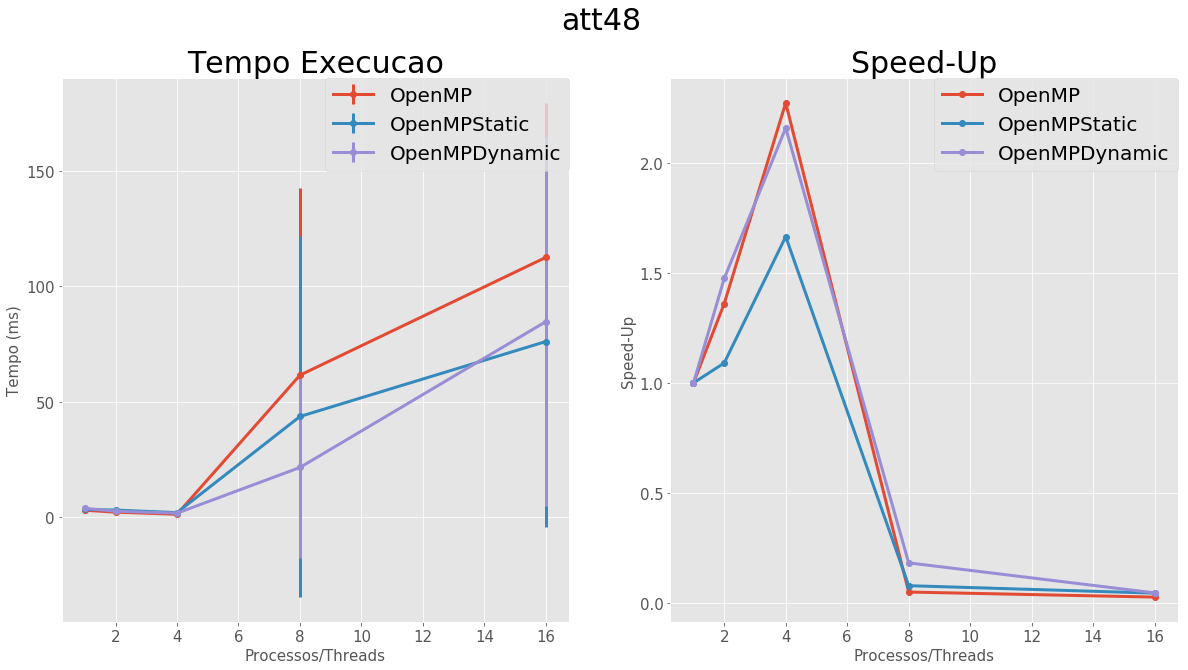

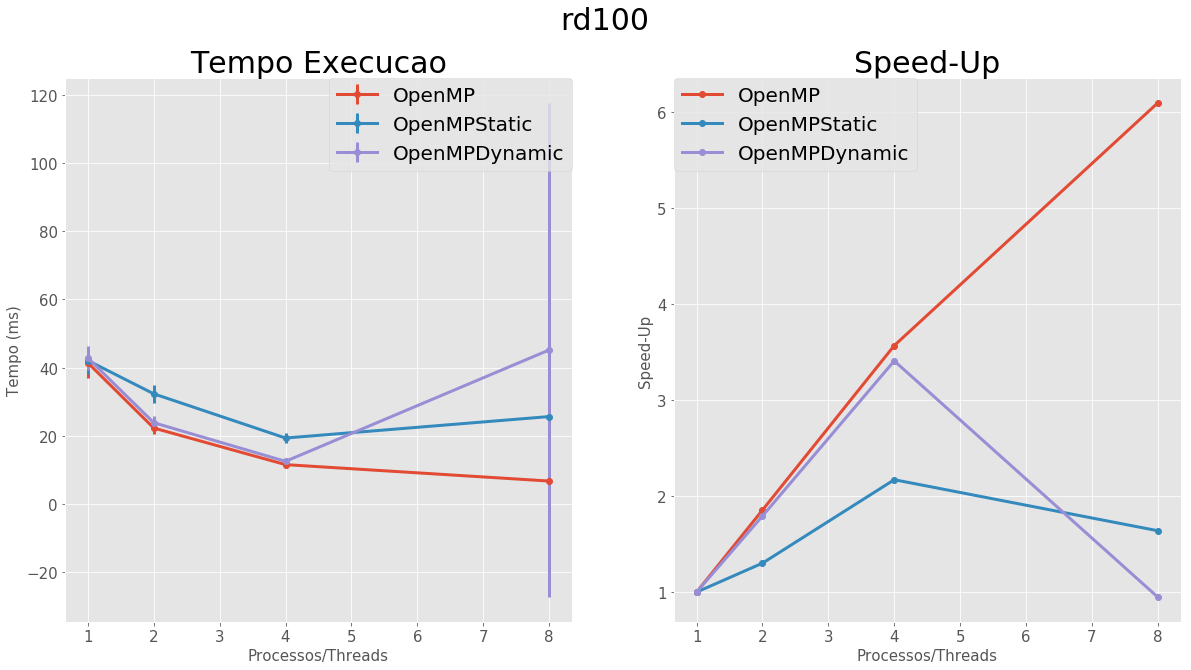

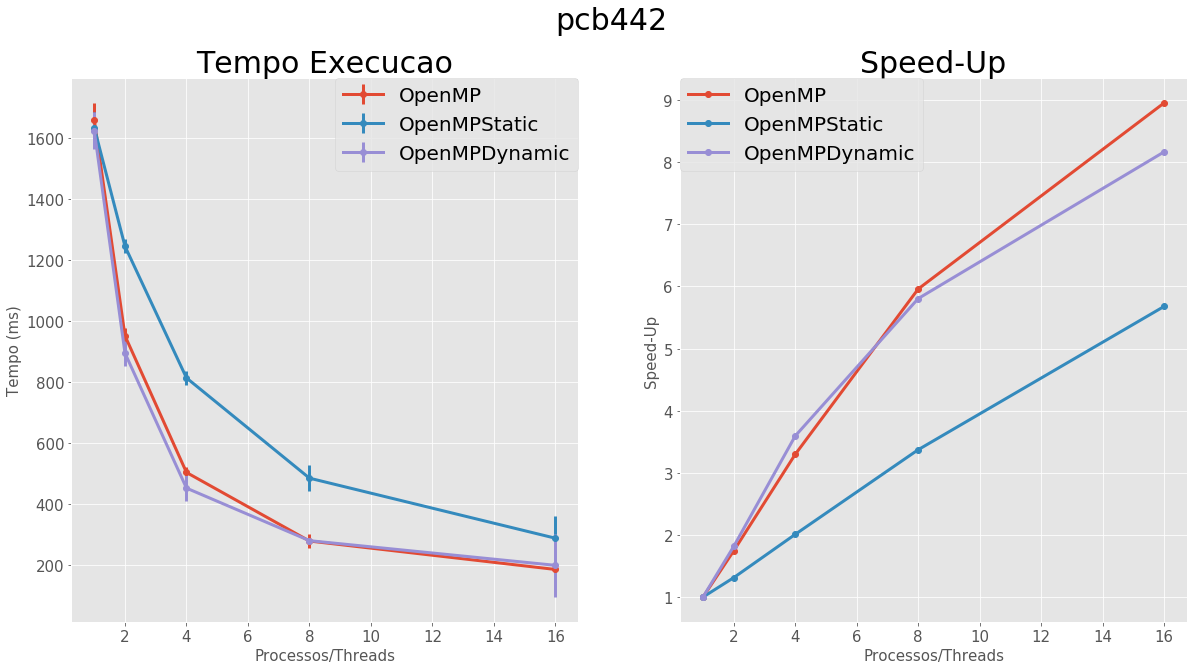

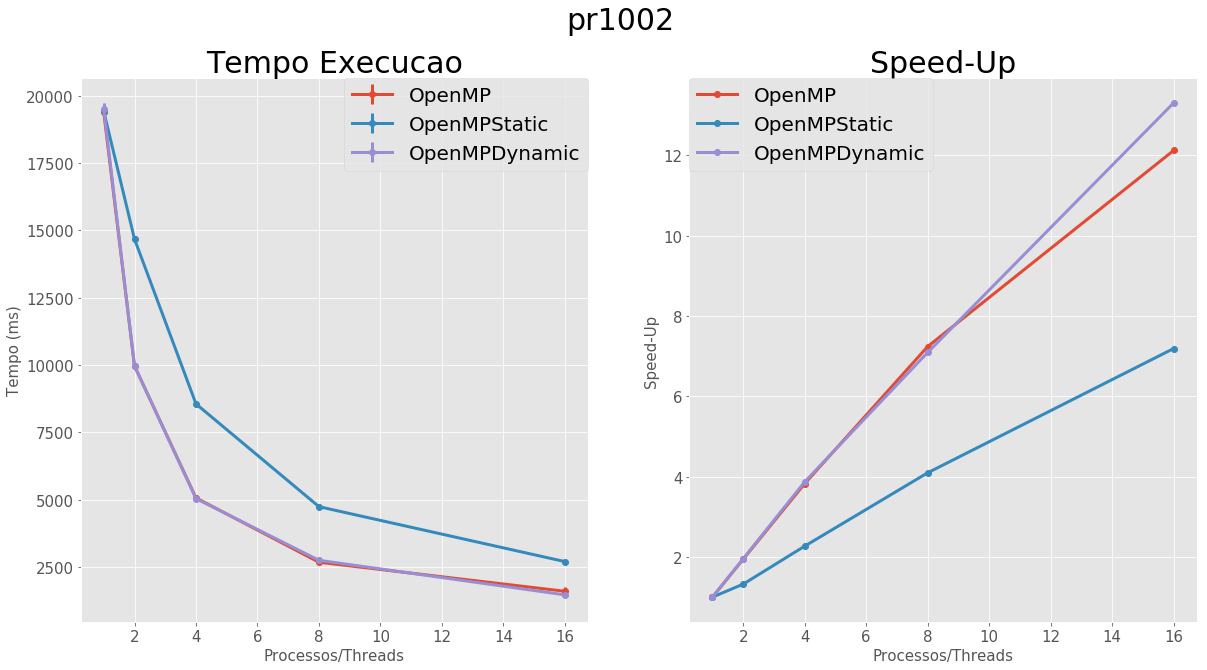

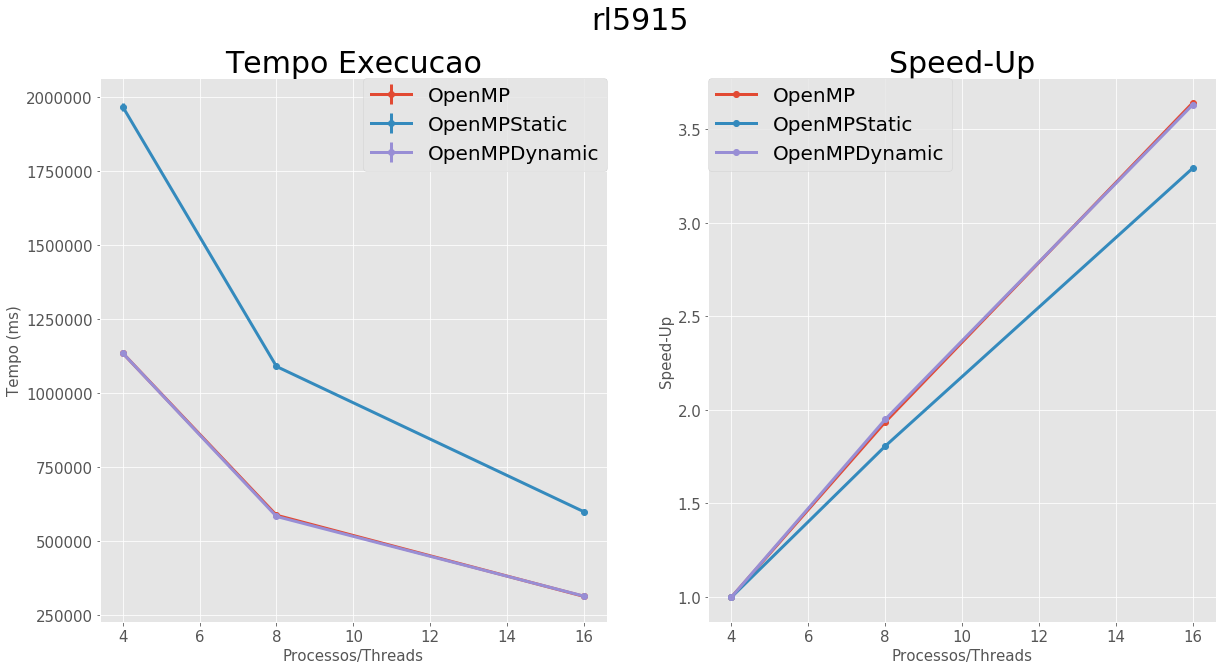

In [219]:
for i, caso in enumerate(casos):
    r = mean_data[mean_data.Caso == caso]
    fig, axis = plt.subplots(1,2, figsize=(20,10))
    plt.suptitle(caso, fontsize=30)
    set_ax_style(axis[0])
    set_ax_style(axis[1])
    for iax, tipo in enumerate(tipos):
        procs = r[r.Tipo==tipo]["Processos/Threads"]
        tempoMPI = np.array(r[r.Tipo==tipo]["TempoTotal"])
        tempoMPIstd = np.array(r[r.Tipo==tipo]["TempoTotal (std)"])
        speedUpMPI = np.power(np.array(tempoMPI),-1)*tempoMPI[0]
        
        if "rd100" in caso:
            procs = procs[:-1]
            tempoMPI = tempoMPI[:-1]
            speedUpMPI = speedUpMPI[:-1]
            tempoMPIstd = tempoMPIstd[:-1]

        axis[0].errorbar(procs, tempoMPI, marker="o",lw=3, label=tipo, yerr=tempoMPIstd)
        axis[1].plot(procs, speedUpMPI, marker="o",lw=3, label=tipo)

    axis[0].legend(borderaxespad=0., fontsize=20)
    axis[0].set_xlabel("Processos/Threads", fontsize=15)
    axis[1].set_xlabel("Processos/Threads", fontsize=15)
    axis[0].set_ylabel("Tempo (ms)", fontsize=15)
    axis[1].set_ylabel("Speed-Up", fontsize=15)
    axis[1].legend(borderaxespad=0., fontsize=20)
    axis[0].set_title("Tempo Execucao", fontsize=30)
    axis[1].set_title("Speed-Up", fontsize=30)

    plt.savefig("Figures/speedup_%s.png" % caso)

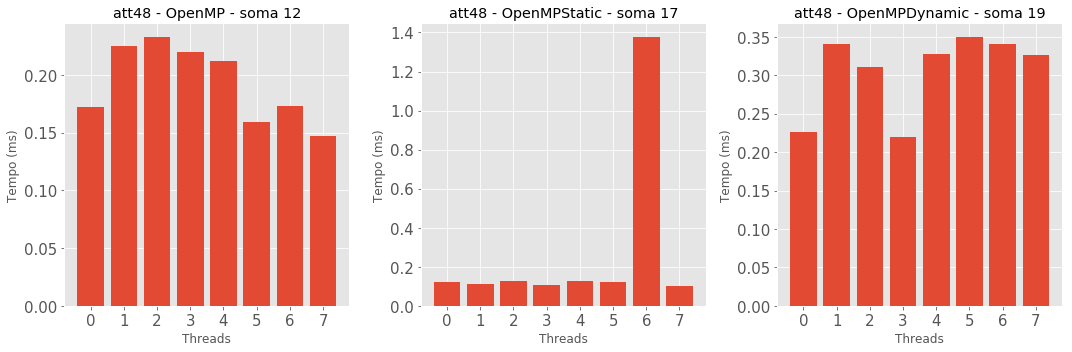

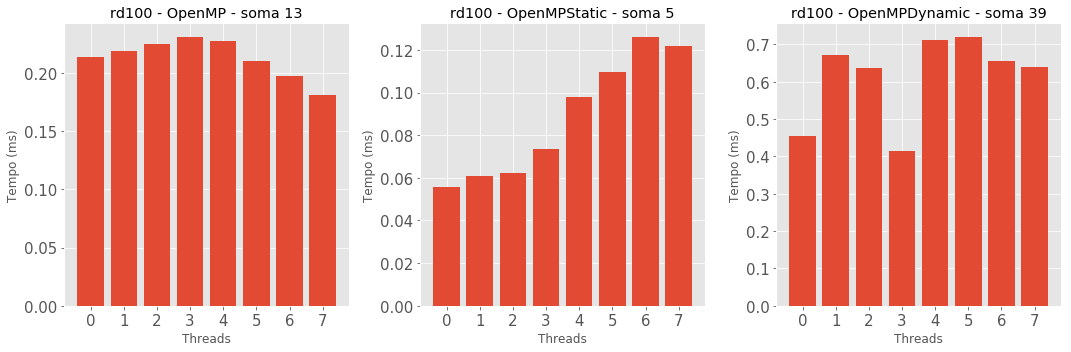

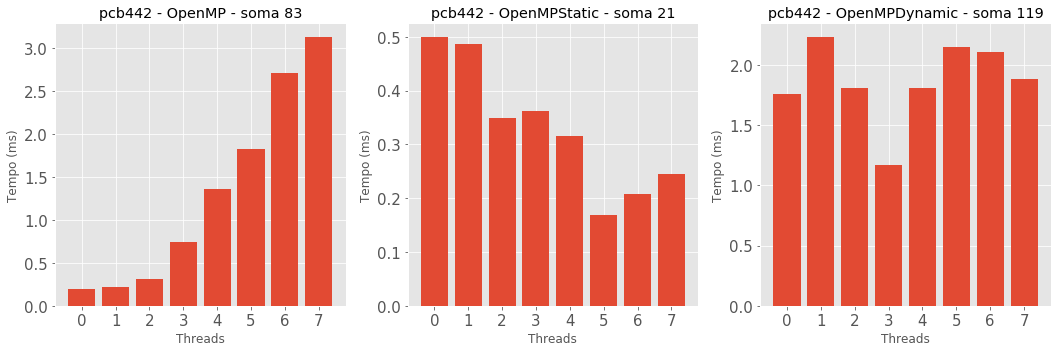

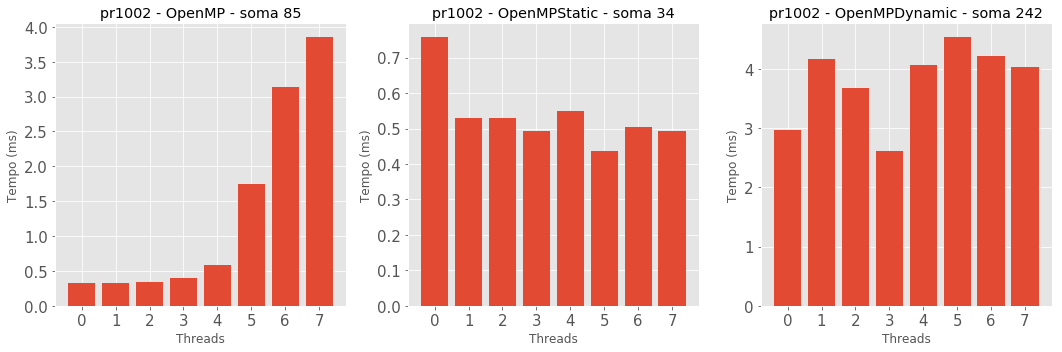

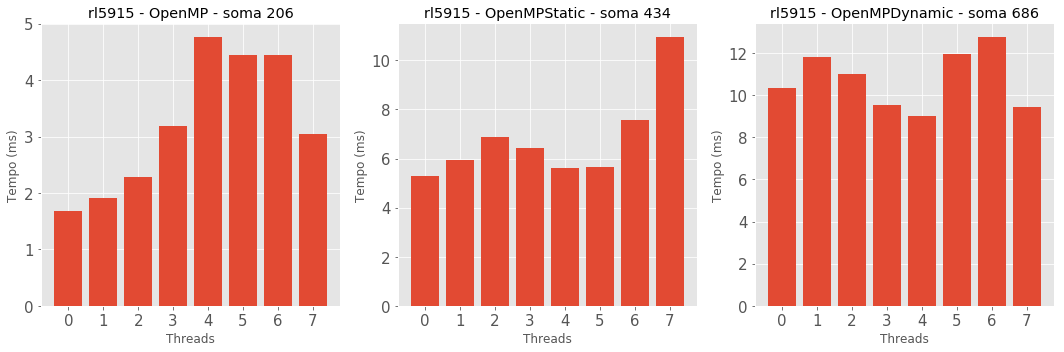

In [207]:
threads = 8

ylimits=[(0,10)]
for icaso, caso in enumerate(casos):
    fig, axis = plt.subplots(1, 3, figsize=(15,5))
    
    for i, tipo in enumerate(tipos):
        f_data = data[(data.Tipo == tipo) & (data.Caso == caso) & (data["Processos/Threads"] == threads)]
        
        n = len(f_data)
        
        media = np.zeros(threads)
        
        for li in range(n):
            idx = f_data.iloc[li]["Id"]
            j = open_json(idx, "NewResults/OpenMPS")
            for run in j["run"]:
                media[run["rank"]] += run["criticalTime"]

        soma = sum(media)
        media = media / threads

        set_ax_style(axis[i])
        axis[i].bar(range(threads), media)
        axis[i].set_title("%s - %s - soma %d" % (caso, tipo, soma))
        axis[i].set_xlabel("Threads")
        axis[i].set_ylabel("Tempo (ms)")
        axis[i].set_xticks(range(threads))
        axis[i].set_xticklabels(tuple(range(threads)))
        #axis[i].set_ylim(y_limits[icaso])
        
    plt.tight_layout()

# Resultados para um nó

In [189]:
names = ["Id", "Caso", "Tipo", "Processos/Threads" ,"TempoTotal", "TempoEncontrarMinimo", "TempoSincronizar", "TempoSwap", "Iteracoes", "CustoCalc", "CustoOtimo", "Lixo"]
data = pd.read_csv("NewResults/resultados_random_umno.txt", sep=";", header=None, names=names)
names = names[1:-1]
data["TempoSincronizar/Iteracoes"] = data["TempoSincronizar"]/data["Iteracoes"]
data["TempoSincronizar"] = data["TempoSincronizar"] - data["TempoSwap"]
names.append("TempoSincronizar/Iteracoes")



In [190]:
data, mean_data, casos, tipos = get_data("NewResults/resultados_random_umno.txt")
print "Casos: ", data.Caso.unique()

Casos:  ['att48' 'rd100' 'pcb442' 'pr1002' 'pr2392' 'rl5915']


## Comparação de Valor da solução encontrada

C:\Users\mateu\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


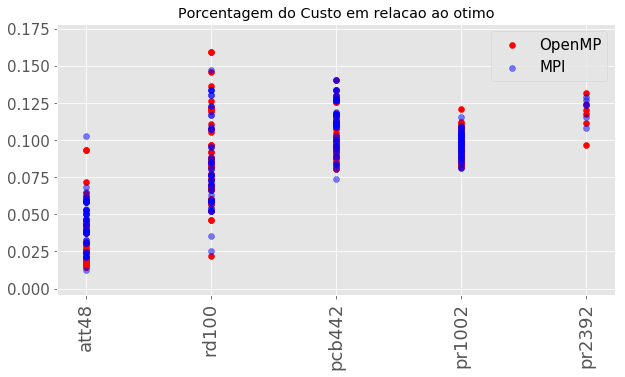

In [191]:
com_solucao = data[data.CustoOtimo > 0]
com_solucao["Otimo"] = (com_solucao.CustoCalc - com_solucao.CustoOtimo)/com_solucao.CustoOtimo
com_solucao[0:10]
casos_com_solucao =  com_solucao.Caso.unique()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
set_ax_style(ax)
xs_omp = []
ys_omp = []
xs_mpi = []
ys_mpi = []
for i, caso in enumerate(casos_com_solucao):
    i += 1
    r = com_solucao[com_solucao.Caso==caso]
    for l in xrange(len(r)):
        if r.iloc[l]["Tipo"] == "OpenMP":
            xs_omp.append(i)
            ys_omp.append(r.iloc[l]["Otimo"])
        else:
            xs_mpi.append(i)
            ys_mpi.append(r.iloc[l]["Otimo"])        

# Set number of ticks for x-axis
ax.set_xticks(range(1,len(casos_com_solucao)+1))
# Set ticks labels for x-axis
ax.set_xticklabels(casos_com_solucao, rotation='vertical', fontsize=18)    
ax.scatter(xs_omp, ys_omp, c="red", label="OpenMP")
ax.scatter(xs_mpi, ys_mpi, c="blue", label="MPI",  alpha=0.5)
ax.set_title("Porcentagem do Custo em relacao ao otimo")
ax.legend(fontsize=15)

In [192]:
data[:5]

,Id,Caso,Tipo,Processos/Threads,TempoTotal,TempoEncontrarMinimo,TempoSincronizar,TempoSwap,Iteracoes,CustoCalc,CustoOtimo,Lixo,TempoSincronizar/Iteracoes,Tamanho
0,15043897706000082986396,att48,MPI,1,4.336914,4.159668,0.057373,0.103027,47,34233.095557,33523.708507,NaN,0.003413,48
72,15043897935000019470601,att48,MPI,2,2.558105,1.986816,0.456543,0.091553,44,34810.655016,33523.708507,NaN,0.012457,48
71,1504389793020244267,att48,OpenMP,1,4.443115,4.273682,0.046875,0.092285,48,34111.785836,33523.708507,NaN,0.002899,48
70,15043897935000019135377,att48,MPI,1,4.077881,3.920166,0.056396,0.088379,44,34810.655016,33523.708507,NaN,0.003290,48
69,150438979229000076965446,att48,OpenMP,16,1.663086,0.348877,1.172851,0.109131,45,34903.966921,33523.708507,NaN,0.028488,48


In [193]:
data.Caso = data.Caso.apply(lambda x: x.split("/")[-1].split(".")[0])
data["Tamanho"] = data.Caso.apply(get_size)
data = data.sort_values("Tamanho")
names.append("Tamanho")
data.Tipo = data.Tipo.apply(lambda x: x.strip())
casos = data.Caso.unique()
tipos = data.Tipo.unique()
data.Tamanho.unique()

array([  48,  100,  442, 1002, 2392, 5915], dtype=int64)

In [194]:
mean_data = data[names]
mean_data = mean_data.groupby(names[0:3], as_index=False).mean()

mean_data[:5]


,Caso,Tipo,Processos/Threads,TempoTotal,TempoEncontrarMinimo,TempoSincronizar,TempoSwap,Iteracoes,CustoCalc,CustoOtimo,TempoSincronizar/Iteracoes,Tamanho
0,att48,MPI,1,4.093823,3.932446,0.055469,0.088330,44.3,34817.695593,33523.708507,0.003248,48.0
1,att48,MPI,2,2.515747,1.942529,0.459033,0.090796,42.9,35161.449339,33523.708507,0.012830,48.0
2,att48,MPI,4,1.943286,1.048267,0.777710,0.090381,44.1,35021.863696,33523.708507,0.019657,48.0
3,att48,MPI,8,1.936304,0.577026,1.240063,0.090430,44.6,35123.831301,33523.708507,0.029844,48.0
4,att48,MPI,16,1.827661,0.351807,1.350342,0.097241,46.4,34902.876073,33523.708507,0.031238,48.0


In [195]:
std_data = data.groupby(names[0:3], as_index=True).std()
for name in names[3:]:
    key = "%s (std)" % name
    mean_data[key.strip()] = np.array(std_data[name])

mean_data[mean_data.Caso=="att48"]

,Caso,Tipo,Processos/Threads,TempoTotal,TempoEncontrarMinimo,TempoSincronizar,TempoSwap,Iteracoes,CustoCalc,CustoOtimo,...,Tamanho,TempoTotal (std),TempoEncontrarMinimo (std),TempoSincronizar (std),TempoSwap (std),Iteracoes (std),CustoCalc (std),CustoOtimo (std),TempoSincronizar/Iteracoes (std),Tamanho (std)
0,att48,MPI,1,4.093823,3.932446,0.055469,0.088330,44.3,34817.695593,33523.708507,...,48.0,0.308594,0.297567,0.005254,0.008709,3.368151,534.760329,0.0,0.000180,0.0
1,att48,MPI,2,2.515747,1.942529,0.459033,0.090796,42.9,35161.449339,33523.708507,...,48.0,0.145808,0.118979,0.031325,0.006666,2.558211,406.892774,0.0,0.000681,0.0
2,att48,MPI,4,1.943286,1.048267,0.777710,0.090381,44.1,35021.863696,33523.708507,...,48.0,0.137635,0.056902,0.075818,0.006292,2.424413,430.373920,0.0,0.000847,0.0
3,att48,MPI,8,1.936304,0.577026,1.240063,0.090430,44.6,35123.831301,33523.708507,...,48.0,0.113232,0.032240,0.081312,0.007372,2.547330,731.897329,0.0,0.001126,0.0
4,att48,MPI,16,1.827661,0.351807,1.350342,0.097241,46.4,34902.876073,33523.708507,...,48.0,0.068144,0.022385,0.048608,0.008859,2.412928,591.190474,0.0,0.001217,0.0
5,att48,OpenMP,1,4.198193,4.031738,0.046582,0.089966,45.4,34715.680978,33523.708507,...,48.0,0.186663,0.183086,0.003466,0.004625,2.011080,482.049724,0.0,0.000122,0.0
6,att48,OpenMP,2,2.352978,2.063696,0.144092,0.113257,44.4,34772.452501,33523.708507,...,48.0,0.170708,0.148134,0.022657,0.010631,3.204164,816.560785,0.0,0.000410,0.0
7,att48,OpenMP,4,1.350391,1.047241,0.172266,0.103906,42.7,34660.351277,33523.708507,...,48.0,0.082717,0.070348,0.017209,0.007597,3.020302,746.216633,0.0,0.000487,0.0
8,att48,OpenMP,8,20.270532,0.582031,19.551318,0.109131,43.6,34710.272953,33523.708507,...,48.0,60.502643,0.083720,60.570520,0.009889,2.716207,551.479385,0.0,1.288320,0.0
9,att48,OpenMP,16,17.666113,0.347070,17.176392,0.109033,45.0,34973.090194,33523.708507,...,48.0,16.510347,0.017471,16.523207,0.005735,1.943651,499.841670,0.0,0.388028,0.0


In [196]:
data, mean_data, casos, tipos = get_data("NewResults/resultados_random_umno.txt")

In [197]:
results={}

for caso in mean_data["Caso"].unique():
    results[caso] = pd.DataFrame(mean_data[mean_data.Caso == caso])

att48 [ 1.          1.62727937  2.10664965  2.11424644  2.23992455]
att48 [ 1.          1.78420397  3.10887316  0.2071082   0.23764103]
rd100 [ 1.          1.86704648  3.24559984  4.88740988  6.72634275]
rd100 [ 1.          1.89775526  3.53247184  4.16662998  1.83969922]
pcb442 [ 1.          1.78351242  3.05947351  4.85074733  7.80538595]
pcb442 [ 1.          1.68801248  2.92373209  4.79159414  7.38753457]
pr1002 [  1.           1.9754929    3.84754633   7.12137252  12.7181882 ]
pr1002 [  1.           1.95547125   3.81820307   7.09514224  12.68889178]
pr2392 [ 1.          1.87986412  3.53864522]
pr2392 [ 1.          2.05541554  3.81794658]
rl5915 [ 1.          1.94004728  3.64394853]
rl5915 [ 1.          1.93108931  3.6376122 ]


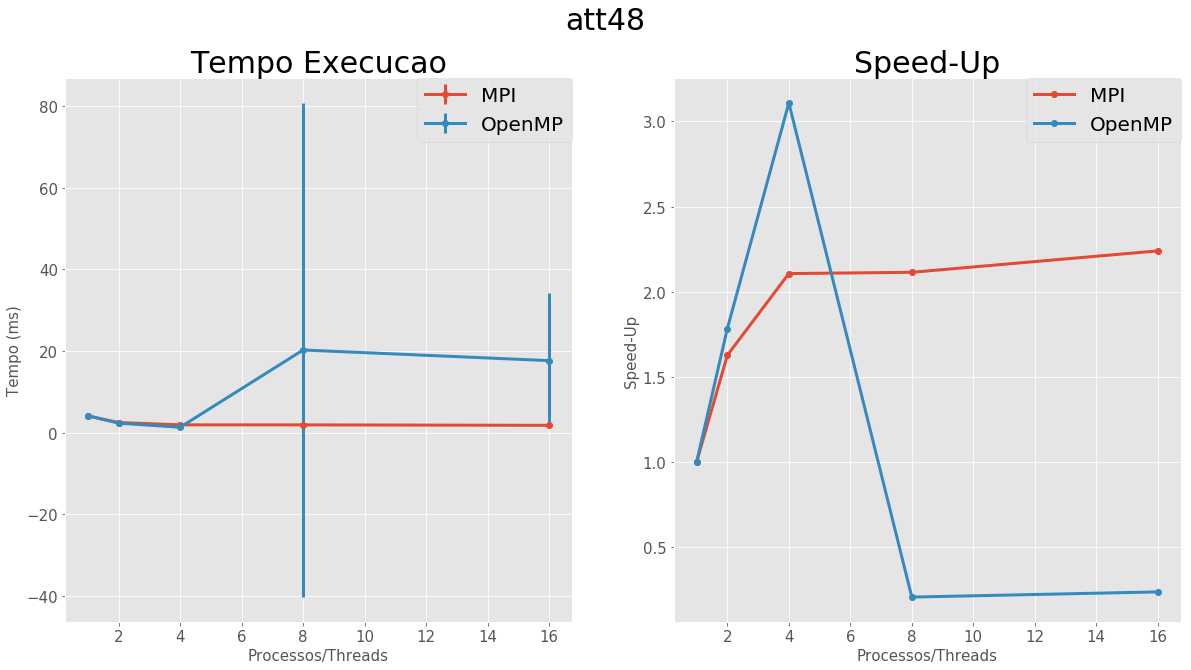

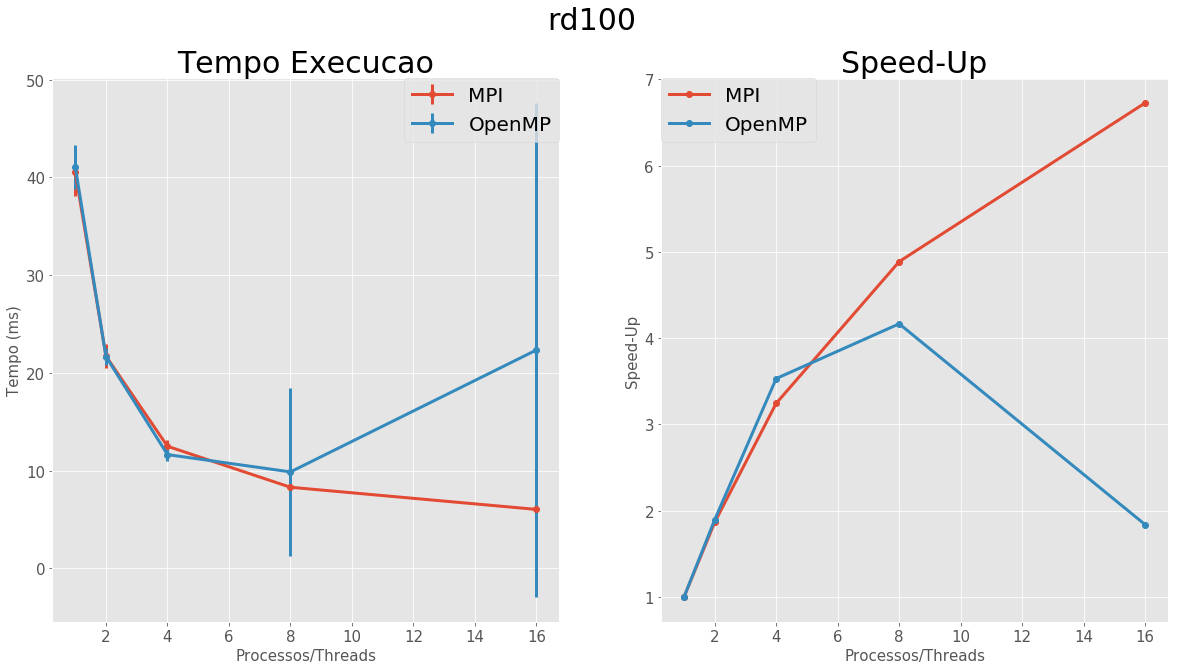

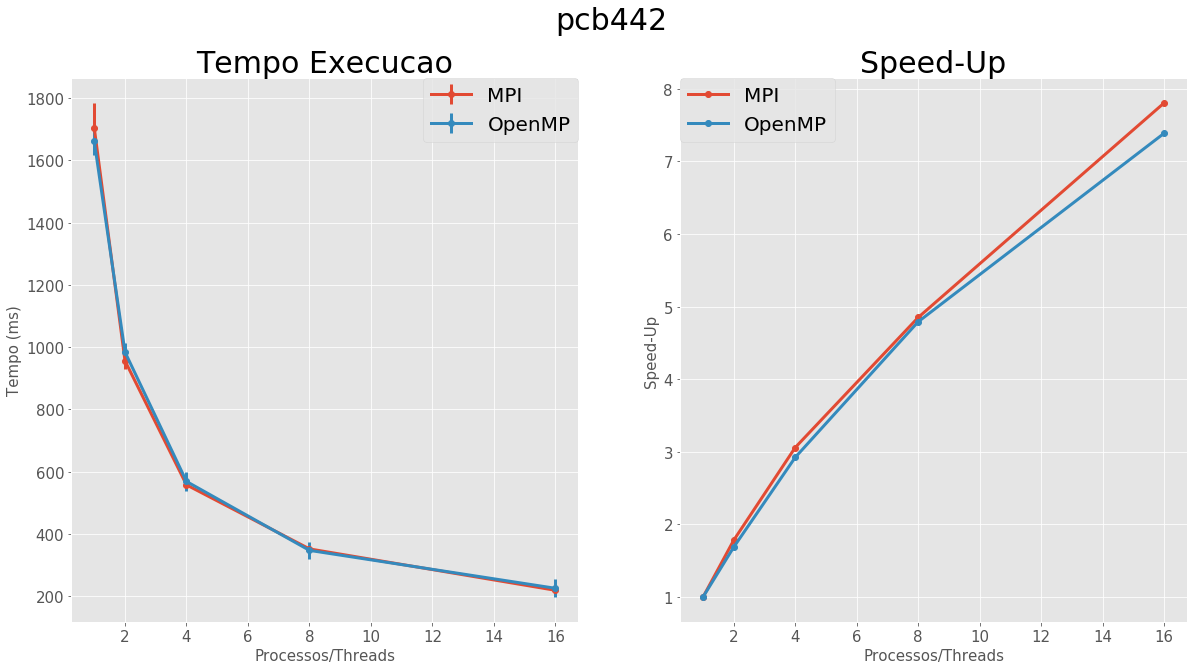

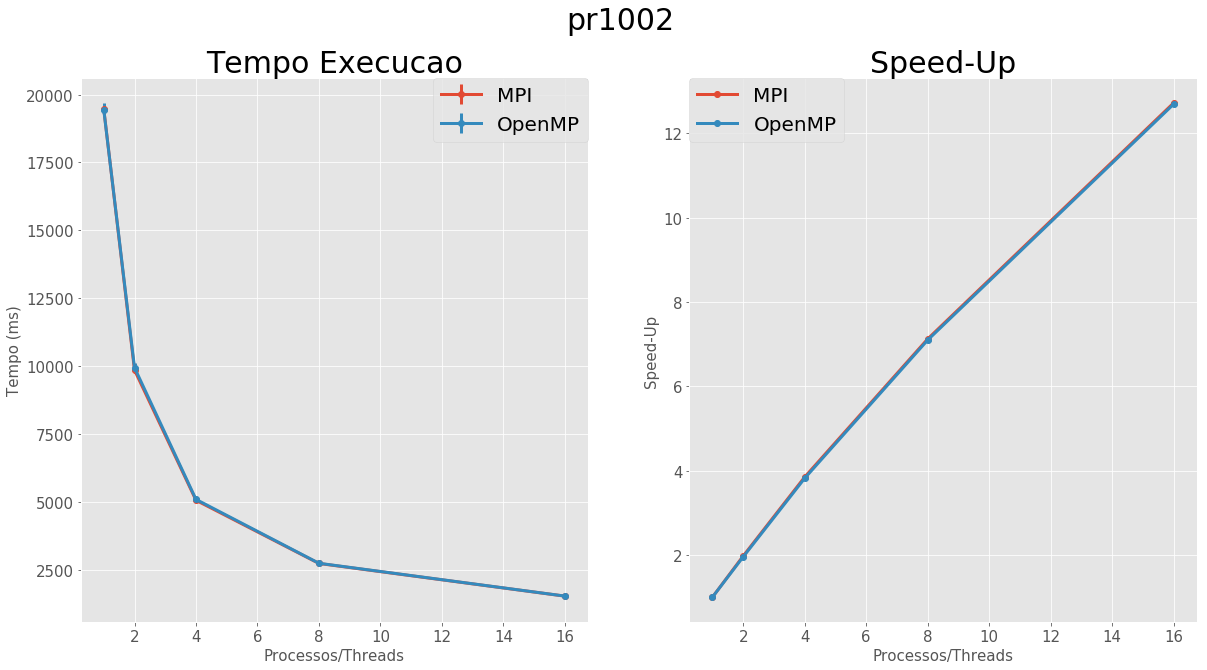

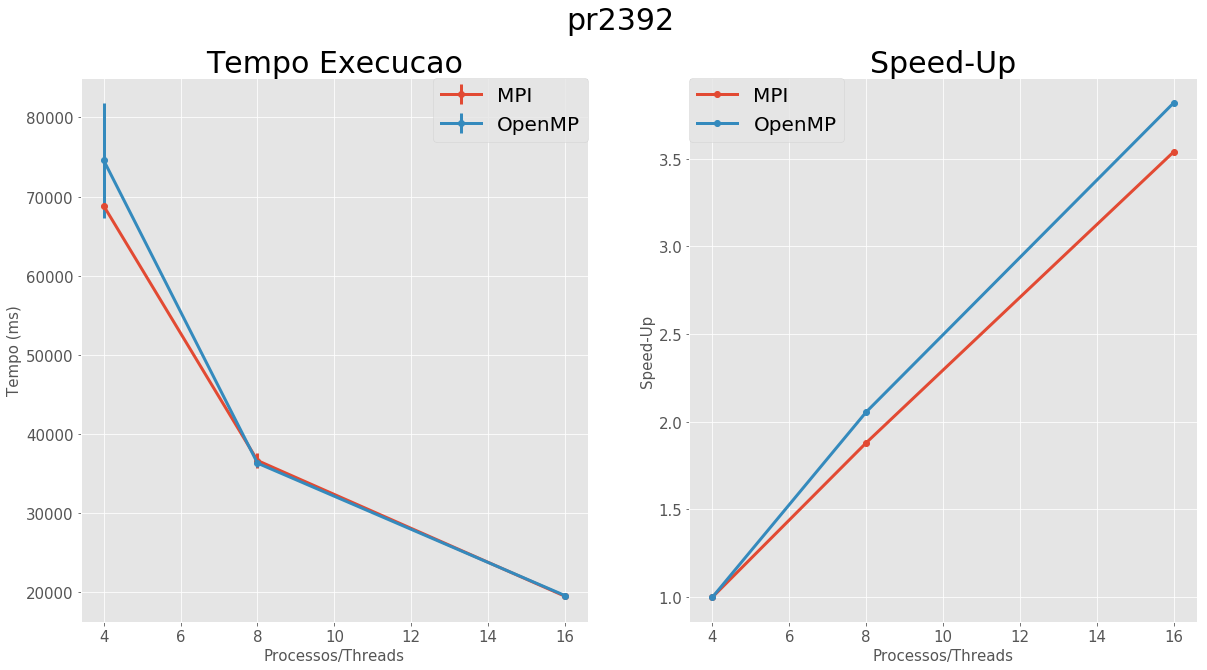

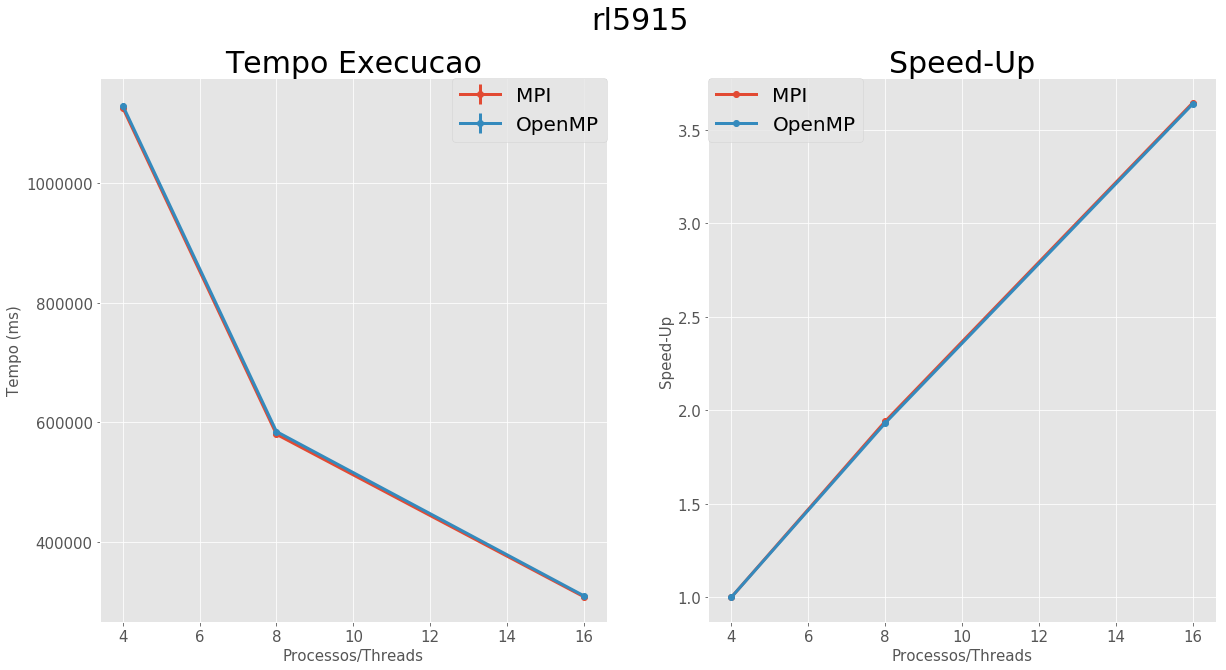

In [161]:
for i, caso in enumerate(casos):
    r = results[caso]
    fig, axis = plt.subplots(1,2, figsize=(20,10))
    set_ax_style(axis[0])
    set_ax_style(axis[1])
    
    procs = r[r.Tipo=="MPI"]["Processos/Threads"]
    tempoMPI = np.array(r[r.Tipo=="MPI"]["TempoTotal"])
    tempoMPIstd = np.array(r[r.Tipo=="MPI"]["TempoTotal (std)"])
    speedUpMPI = np.power(np.array(tempoMPI),-1)*tempoMPI[0]
    
    tempoOpenMP = np.array(r[r.Tipo=="OpenMP"]["TempoTotal"])
    if( len(tempoOpenMP) > 0):
        tempoOpenMPstd = np.array(r[r.Tipo=="OpenMP"]["TempoTotal (std)"])
        speedUpOpenMP = np.power(np.array(tempoOpenMP),-1)*tempoOpenMP[0]
    
    print caso, speedUpMPI
    print caso, speedUpOpenMP
    
    axis[0].errorbar(procs, tempoMPI, marker="o",lw=3, label="MPI", yerr=tempoMPIstd)
    axis[1].plot(procs, speedUpMPI, marker="o",lw=3, label="MPI")
    if( len(tempoOpenMP) > 0):    
        axis[0].errorbar(procs, tempoOpenMP, yerr=tempoOpenMPstd, marker="o", lw=3, label="OpenMP")
        axis[1].plot(procs, speedUpOpenMP, marker="o", lw=3, label="OpenMP")
    
    axis[0].legend(borderaxespad=0., fontsize=20)
    axis[0].set_xlabel("Processos/Threads", fontsize=15)
    axis[1].set_xlabel("Processos/Threads", fontsize=15)
    axis[0].set_ylabel("Tempo (ms)", fontsize=15)
    axis[1].set_ylabel("Speed-Up", fontsize=15)
    axis[1].legend(borderaxespad=0., fontsize=20)
    axis[0].set_title("Tempo Execucao", fontsize=30)
    axis[1].set_title("Speed-Up", fontsize=30)
    plt.suptitle(caso, fontsize=30)
    
    plt.savefig("Figures/speedup_%s.png" % caso)

rd100 [ 1.         1.5058572  2.0724498]
rd100 [ 1.          1.17952249  0.52079657]
pcb442 [ 1.          1.58548434  2.55121868]
pcb442 [ 1.          1.63886225  2.52674812]
pr1002 [ 1.          1.85088675  3.30553218]
pr1002 [ 1.          1.85824119  3.32326268]
rl5915 [ 1.          1.94004728  3.64394853]
rl5915 [ 1.          1.93108931  3.6376122 ]


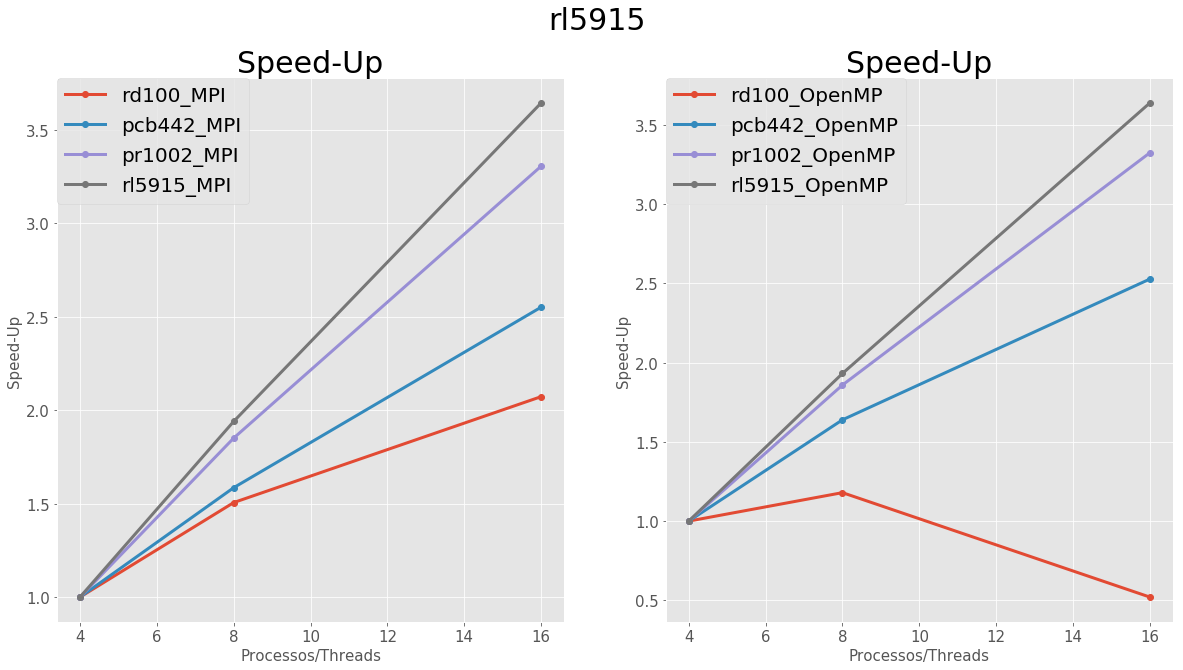

In [162]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
for i, caso in enumerate(casos):
    if caso != "pr2392" and caso!="att48":
        r = results[caso]

        r = r[r["Processos/Threads"] >= 4 ]
        set_ax_style(ax[0])
        set_ax_style(ax[1])

        procs = r[r.Tipo=="MPI"]["Processos/Threads"]
        tempoMPI = np.array(r[r.Tipo=="MPI"]["TempoTotal"])
        tempoMPIstd = np.array(r[r.Tipo=="MPI"]["TempoTotal (std)"])
        speedUpMPI = np.power(np.array(tempoMPI),-1)*tempoMPI[0]

        tempoOpenMP = np.array(r[r.Tipo=="OpenMP"]["TempoTotal"])
        if( len(tempoOpenMP) > 0):
            tempoOpenMPstd = np.array(r[r.Tipo=="OpenMP"]["TempoTotal (std)"])
            speedUpOpenMP = np.power(np.array(tempoOpenMP),-1)*tempoOpenMP[0]

        print caso, speedUpMPI
        print caso, speedUpOpenMP

        ax[0].plot(procs, speedUpMPI, marker="o",lw=3, label="%s_MPI"%caso)
        if( len(tempoOpenMP) > 0):    
            ax[1].plot(procs, speedUpOpenMP, marker="o", lw=3, label="%s_OpenMP"%caso)

        for k in [0,1]:
            ax[k].set_xlabel("Processos/Threads", fontsize=15)
            ax[k].set_ylabel("Speed-Up", fontsize=15)
            ax[k].legend(borderaxespad=0., fontsize=20)
            ax[k].set_title("Speed-Up", fontsize=30)
            plt.suptitle(caso, fontsize=30)

        plt.savefig("Figures/speedup_%s.png" % caso)

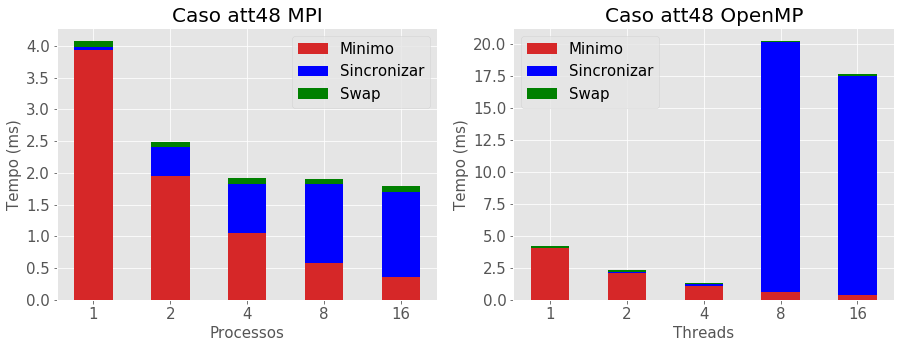

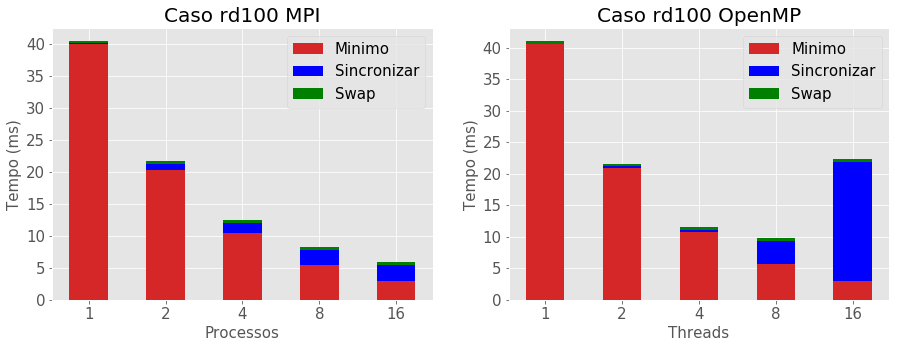

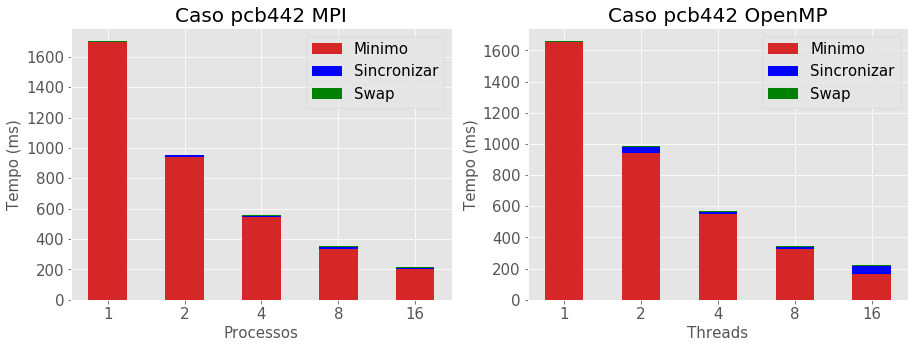

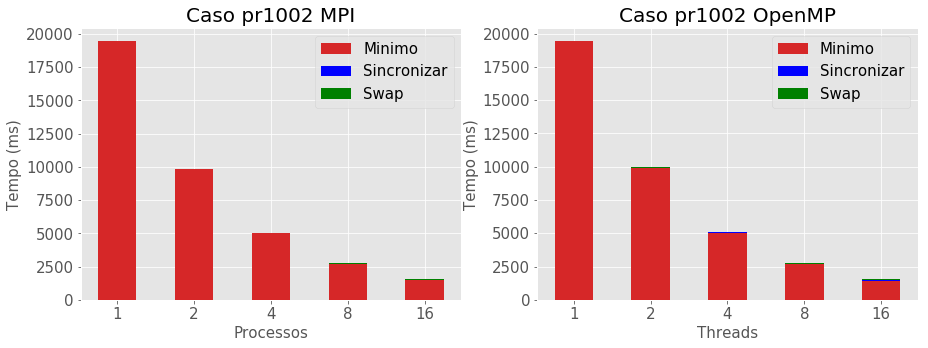

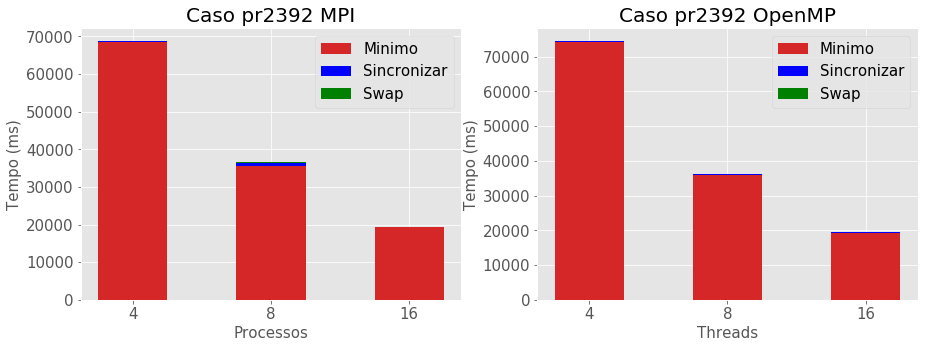

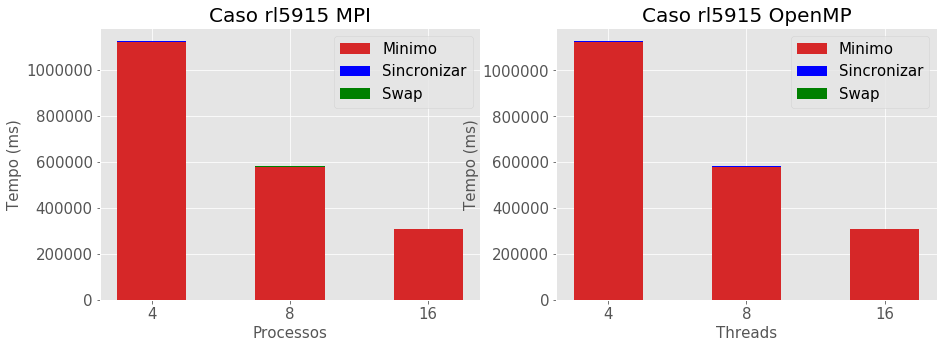

In [163]:
for caso in casos:
    fig, axis = plt.subplots(1,2, figsize=(15,5))

    for iax,tipo in enumerate(tipos):
        set_ax_style(axis[iax])
        width = 0.5       # the width of the bars: can also be len(x) sequence

        r = results[caso]
        procs = r[r.Tipo==tipo]["Processos/Threads"]

        # positions of the left bar-boundaries
        bar_l = [i+1 for i in range(len(procs))]

        # positions of the x-axis ticks (center of the bars as bar labels)
        tick_pos = [i+(width/2) for i in bar_l]   

        tempoEncMinMPI = np.array(r[r.Tipo==tipo]["TempoEncontrarMinimo"])
        tempoEncMinMPIStd = np.array(r[r.Tipo==tipo]["TempoEncontrarMinimo (std)"])

        tempoSincMPI = np.array(r[r.Tipo==tipo]["TempoSincronizar"])
        tempoSincMPIStd= np.array(r[r.Tipo==tipo]["TempoSincronizar (std)"])

        tempoSwapMPI = np.array(r[r.Tipo==tipo]["TempoSwap"])
        tempoSwapMPIStd= np.array(r[r.Tipo==tipo]["TempoSwap (std)"])

        ind = np.arange(len(procs))    # the x locations for the groups

        axis[iax].set_xticks(ind)
        axis[iax].set_xticklabels(tuple(procs))

        p1 = axis[iax].bar(ind, tempoEncMinMPI, width, color='#d62728')
        p2 = axis[iax].bar(ind, tempoSincMPI, width,
                     bottom=tempoEncMinMPI, color="blue")
        p3 = axis[iax].bar(ind, tempoSwapMPI, width,
                     bottom=tempoSincMPI+tempoEncMinMPI, color="green")

        axis[iax].legend(loc='upper left')
        axis[iax].set_ylabel('Tempo (ms)', fontsize=15)
        axis[iax].set_xlabel('Processos' if tipo == "MPI" else "Threads", fontsize=15)
        axis[iax].set_title('Caso %s %s' % (caso, tipo), fontsize=20)

        axis[iax].legend((p1[0], p2[0], p3[0]), ('Minimo', 'Sincronizar', 'Swap'), fontsize=15)    
    
    plt.savefig("Figures/bar_abs_%s.png"%(caso))
    plt.show()



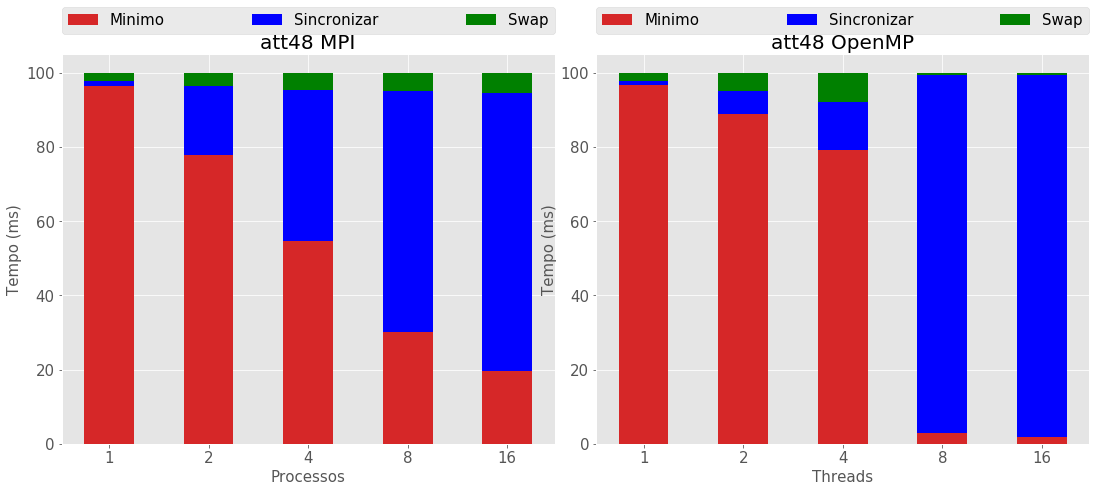

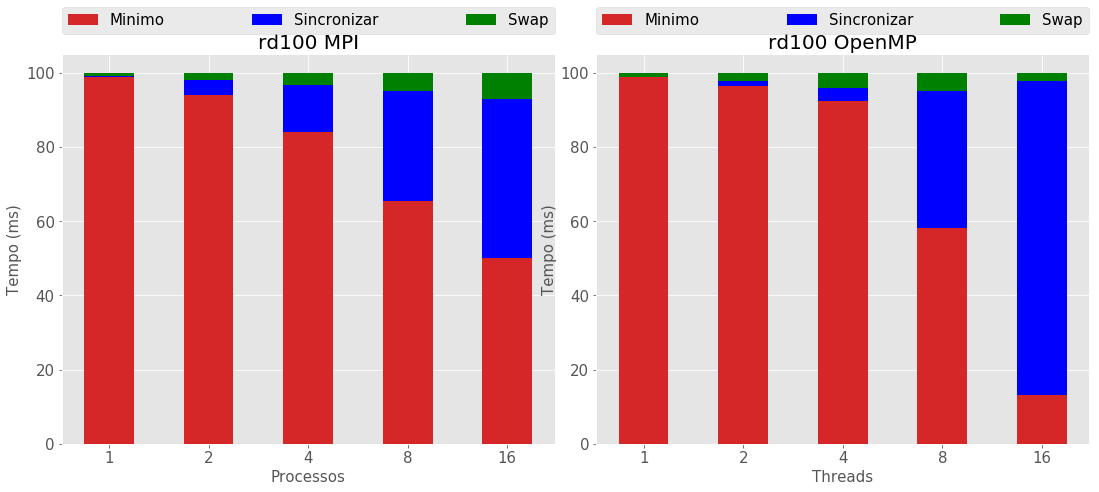

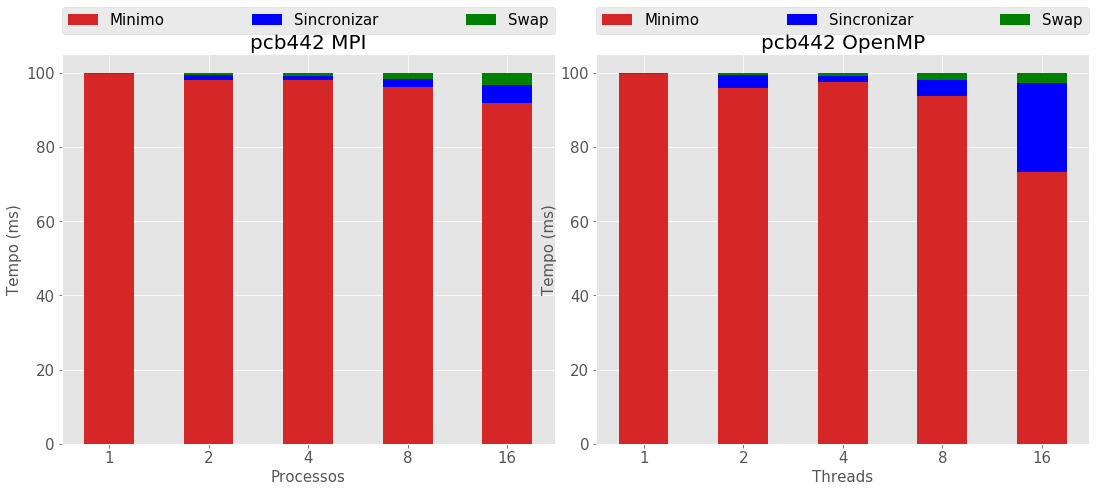

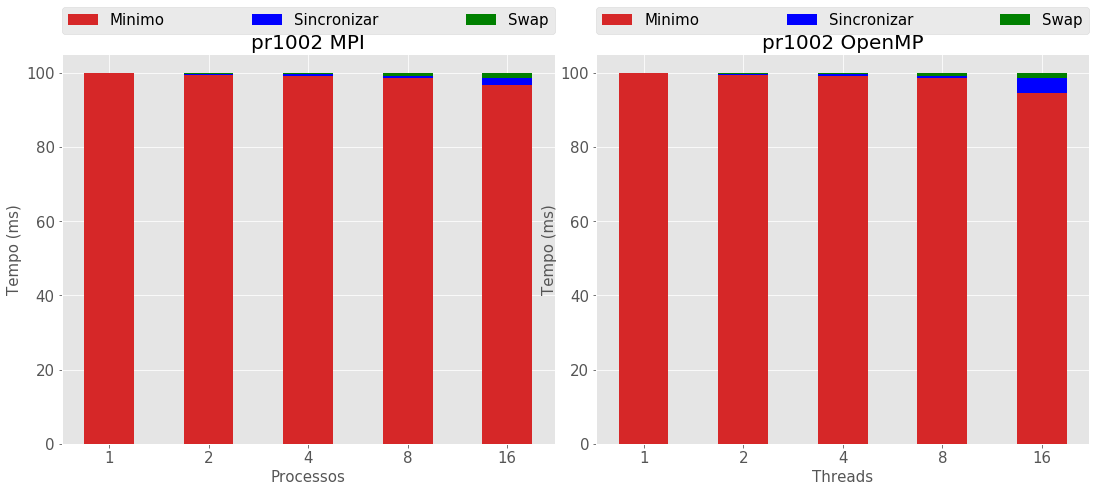

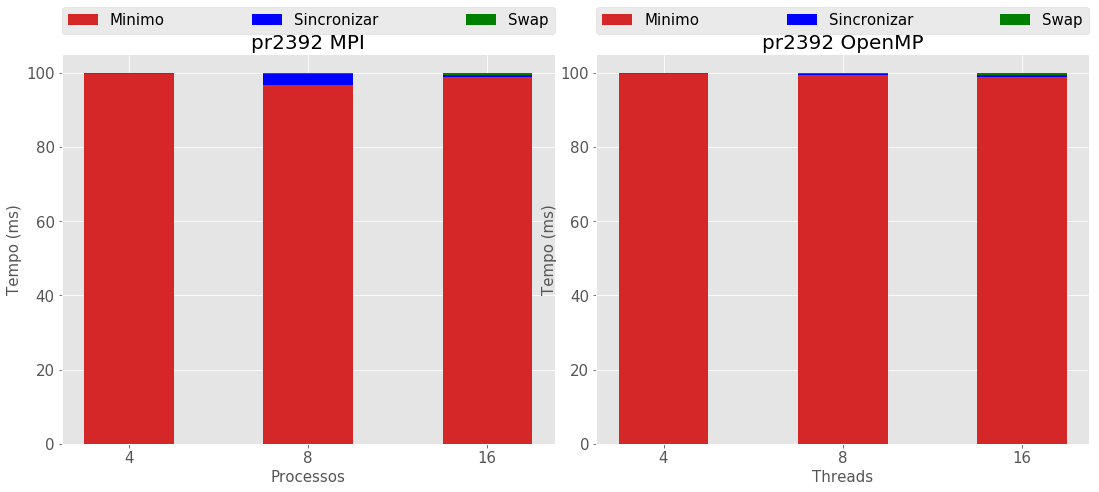

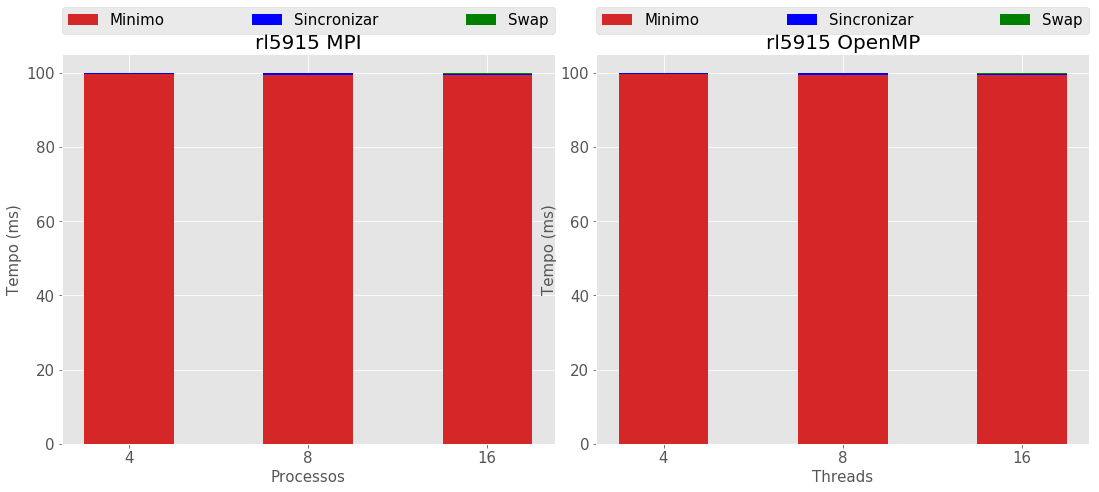

In [164]:
for caso in casos:
    fig, axis = plt.subplots(1,2, figsize=(15,6))
    plt.tight_layout()
    for iax,tipo in enumerate(tipos):
        set_ax_style(axis[iax])
        width = 0.5       # the width of the bars: can also be len(x) sequence

        r = results[caso]
        procs = r[r.Tipo==tipo]["Processos/Threads"]

        # positions of the left bar-boundaries
        bar_l = [i+1 for i in range(len(procs))]

        # positions of the x-axis ticks (center of the bars as bar labels)
        tick_pos = [i+(width/2) for i in bar_l]   

        tempoEncMinMPI = np.array(r[r.Tipo==tipo]["TempoEncontrarMinimo"])

        tempoSincMPI = np.array(r[r.Tipo==tipo]["TempoSincronizar"])

        tempoSwapMPI = np.array(r[r.Tipo==tipo]["TempoSwap"])

        tempoTotal = tempoEncMinMPI + tempoSincMPI + tempoSwapMPI
        
        tempoEncMinMPI = 100*tempoEncMinMPI/tempoTotal
        tempoSincMPI = 100*tempoSincMPI/tempoTotal
        tempoSwapMPI = 100*tempoSwapMPI/tempoTotal
        
        
        ind = np.arange(len(procs))    # the x locations for the groups

        axis[iax].set_xticks(ind)
        axis[iax].set_xticklabels(tuple(procs))

        p1 = axis[iax].bar(ind, tempoEncMinMPI, width, color='#d62728')
        p2 = axis[iax].bar(ind, tempoSincMPI, width,
                     bottom=tempoEncMinMPI, color="blue")
        p3 = axis[iax].bar(ind, tempoSwapMPI, width,
                     bottom=tempoSincMPI+tempoEncMinMPI, color="green")

        axis[iax].set_xlabel('Processos' if tipo == "MPI" else "Threads", fontsize=15)
        axis[iax].set_ylabel('Tempo (ms)', fontsize=15)
        axis[iax].set_title('%s %s' % (caso, tipo), fontsize=20)

        axis[iax].legend((p1[0], p2[0], p3[0]), ('Minimo', 'Sincronizar', 'Swap'), fontsize=15, loc=9, bbox_to_anchor=(0., 1.02, 1., .102), mode="expand", ncol=len(procs), borderaxespad=0.)    

    #
    plt.savefig("Figures/bar_rel_%s.png"%(caso))
    plt.show()

rd100
pcb442
pr1002


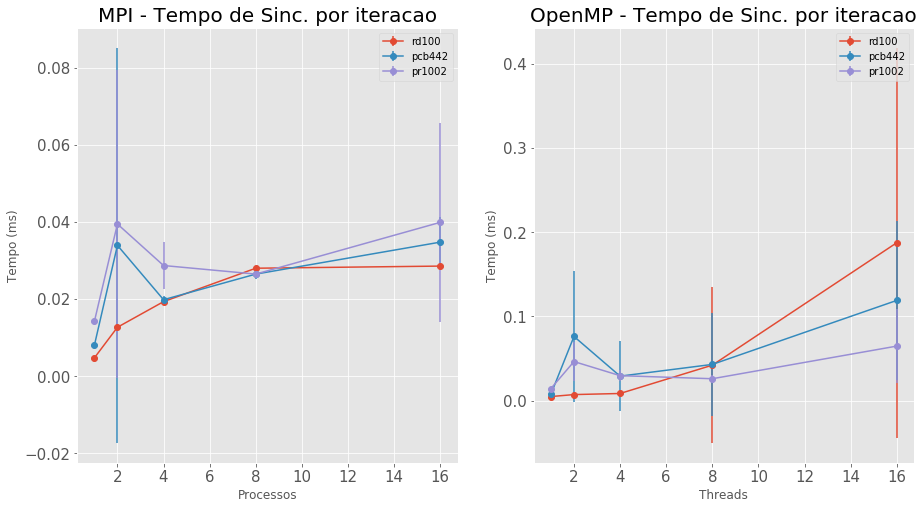

In [165]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
for caso in casos[1:-2]:
    print caso
    for iax, tipo in enumerate(tipos):
        set_ax_style(ax[iax])
        r = results[caso]
        procs = r[r.Tipo==tipo]["Processos/Threads"].unique()
        y = np.array(r[r.Tipo == tipo]["TempoSincronizar/Iteracoes"])
        ystd = np.array(r[r.Tipo == tipo]["TempoSincronizar/Iteracoes (std)"])
        ax[iax].errorbar(procs, y, label=caso, marker="o", yerr=ystd, fmt="")
        ax[iax].set_title("%s - Tempo de Sinc. por iteracao"%tipo, fontsize=20)
        ax[iax].set_xlabel("Processos" if tipo == "MPI" else "Threads")
        ax[iax].set_ylabel("Tempo (ms)")
        ax[iax].legend()

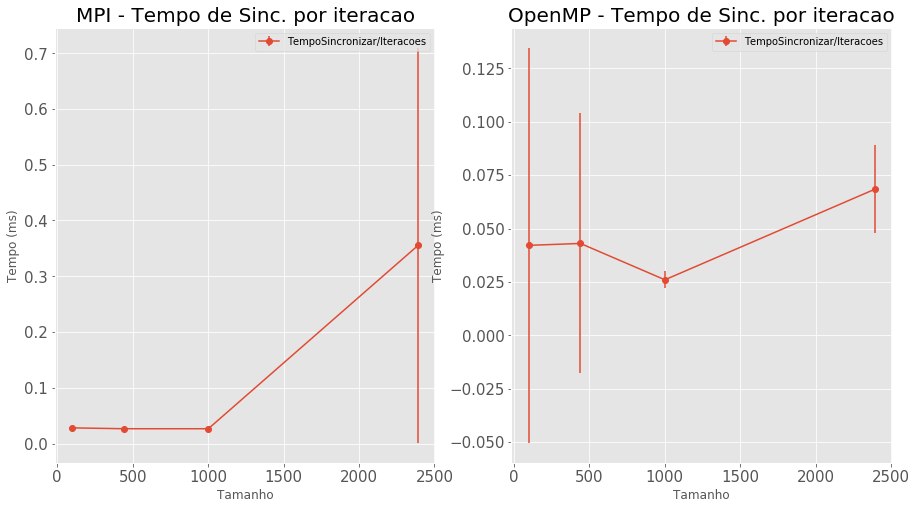

In [166]:
fig, ax = plt.subplots(1,2, figsize=(15,8))

for iax, tipo in enumerate(tipos):
    set_ax_style(ax[iax])
    d = mean_data[(mean_data.Tipo==tipo) & (mean_data["Processos/Threads"]==8) & (mean_data.Caso!="att48") & (mean_data.Tamanho < 3000)]
    d = d.sort_values("Tamanho")
    ax[iax].errorbar(d["Tamanho"], d["TempoSincronizar/Iteracoes"], yerr=d["TempoSincronizar/Iteracoes (std)"], marker="o")
    ax[iax].set_title("%s - Tempo de Sinc. por iteracao"%tipo, fontsize=20)
    ax[iax].set_xlabel("Tamanho")
    ax[iax].set_ylabel("Tempo (ms)")
    ax[iax].legend()
    
plt.savefig("Figures/sync_time.png")




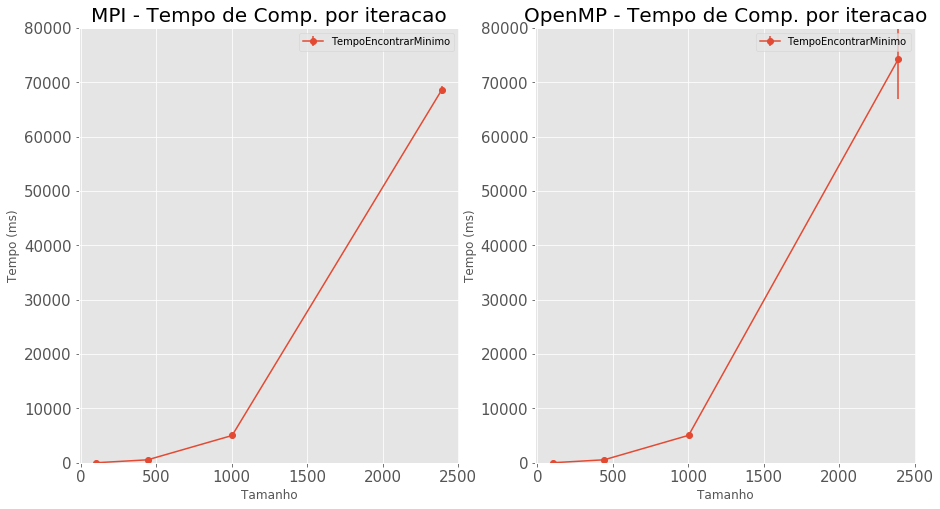

In [167]:
fig, ax = plt.subplots(1,2, figsize=(15,8))

for iax, tipo in enumerate(tipos):
    set_ax_style(ax[iax])
    d = mean_data[(mean_data.Tipo==tipo) & (mean_data["Processos/Threads"]==4) & (mean_data.Caso!="att48") & (mean_data.Tamanho < 3000)]
    d = d.sort_values("Tamanho")
    ax[iax].errorbar(d["Tamanho"], d["TempoEncontrarMinimo"], yerr=d["TempoEncontrarMinimo (std)"], marker="o")
    ax[iax].set_title("%s - Tempo de Comp. por iteracao"%tipo, fontsize=20)
    ax[iax].set_xlabel("Tamanho")
    ax[iax].set_ylabel("Tempo (ms)")
    ax[iax].set_ylim((0, 80e3))
    ax[iax].legend()

plt.savefig("Figures/find_min.png")

In [168]:
openMP2=np.array(data[(data.Caso=="rd100") & (data["Processos/Threads"]==2)]["Id"])
run2 = openMP2[0]

openMP4=np.array(data[(data.Caso=="rd100") & (data["Processos/Threads"]==4)]["Id"])
run4 = openMP4[0]

openMP8=np.array(data[(data.Caso=="rd100") & (data["Processos/Threads"]==8)]["Id"])
run8 = openMP8[0]




In [169]:
def plot_parallel(ax, json_data, caso = ""):
    procs = 0
    width = 0.5
    set_ax_style(ax)
    v = []
    for run in json_data["run"]:
        procs+=1
        v.append(run["parallelTime"])
    
    ax.set_xlabel("Processos/Threads", fontsize=10)
    ax.set_ylabel("Tempo (ms)", fontsize=10)
    ax.set_xticks(range(procs))
    ax.set_xticklabels(tuple(range(procs)))
    ax.bar(range(procs), v, width, color='#d62728')
    umbal = 100*(1 - np.mean(v)/np.max(v))
    ax.set_title("%s \nDesbal. %.2f%%" % (caso, umbal))

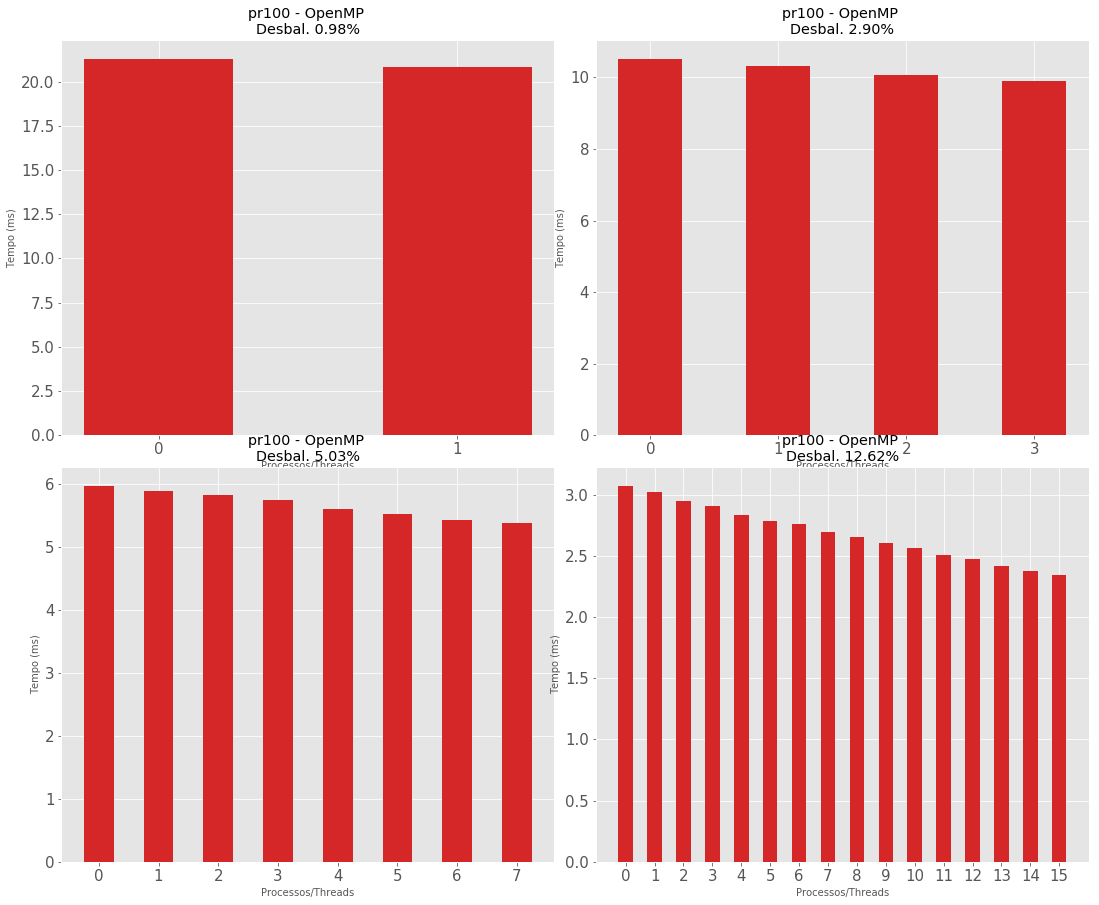

In [170]:
fig, ax = plt.subplots(2,2, figsize=(15,12))
fig.tight_layout()
runs = []
for p in [2, 4, 8 , 16]:
    openMP2=np.array(data[(data.Caso=="rd100") & (data["Processos/Threads"]==p) &(data.Tipo=="OpenMP")]["Id"])
    runs.append(openMP2[1])

for i, run in enumerate(runs):
    plot_parallel(ax[i/2,i%2], open_json(run), caso = "pr100 - OpenMP")

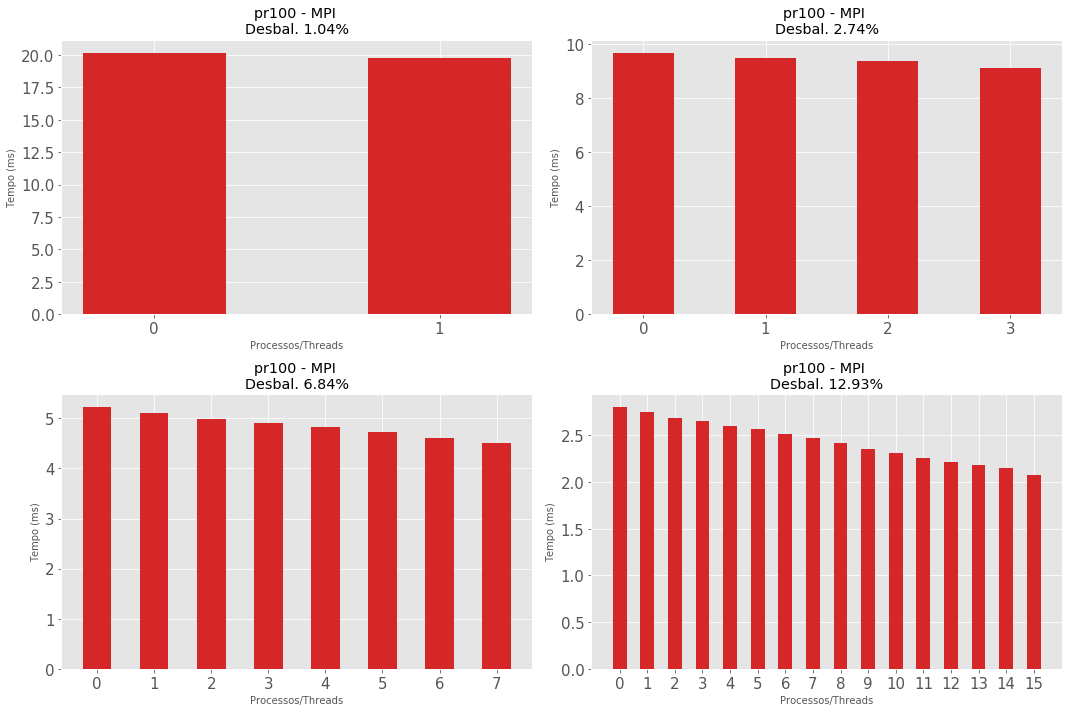

In [171]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
fig.tight_layout()
runs = []
for p in [2, 4, 8 , 16]:
    openMP2=np.array(data[(data.Caso=="rd100") & (data["Processos/Threads"]==p) &(data.Tipo=="MPI")]["Id"])
    runs.append(openMP2[1])

for i, run in enumerate(runs):
    plot_parallel(ax[i/2,i%2], open_json(run), caso = "pr100 - MPI")
fig.tight_layout()
plt.savefig("Figures/desbal_pr100_mpi.png")

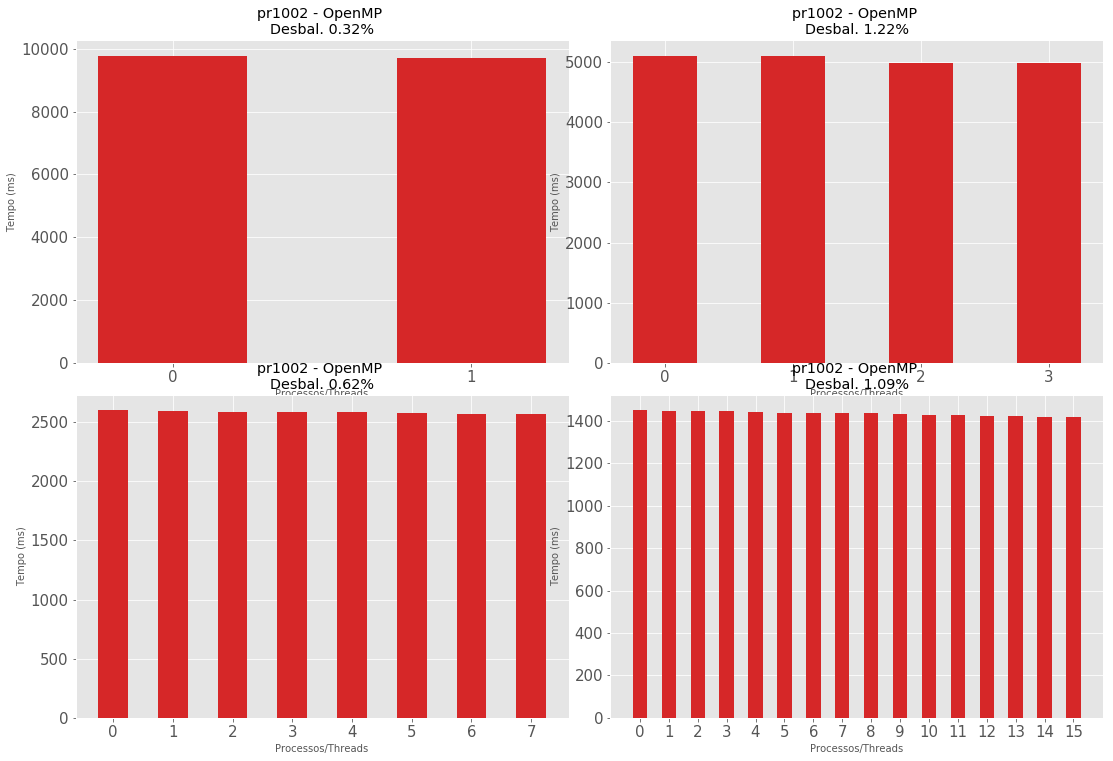

In [172]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
fig.tight_layout()
runs = []
for p in [2, 4, 8 , 16]:
    openMP2=np.array(data[(data.Caso=="pr1002") & (data["Processos/Threads"]==p) &(data.Tipo=="OpenMP")]["Id"])
    runs.append(openMP2[1])

for i, run in enumerate(runs):
    plot_parallel(ax[i/2,i%2], open_json(run), caso = "pr1002 - OpenMP")

plt.savefig("Figures/desbal_pr1002_openmp.png")

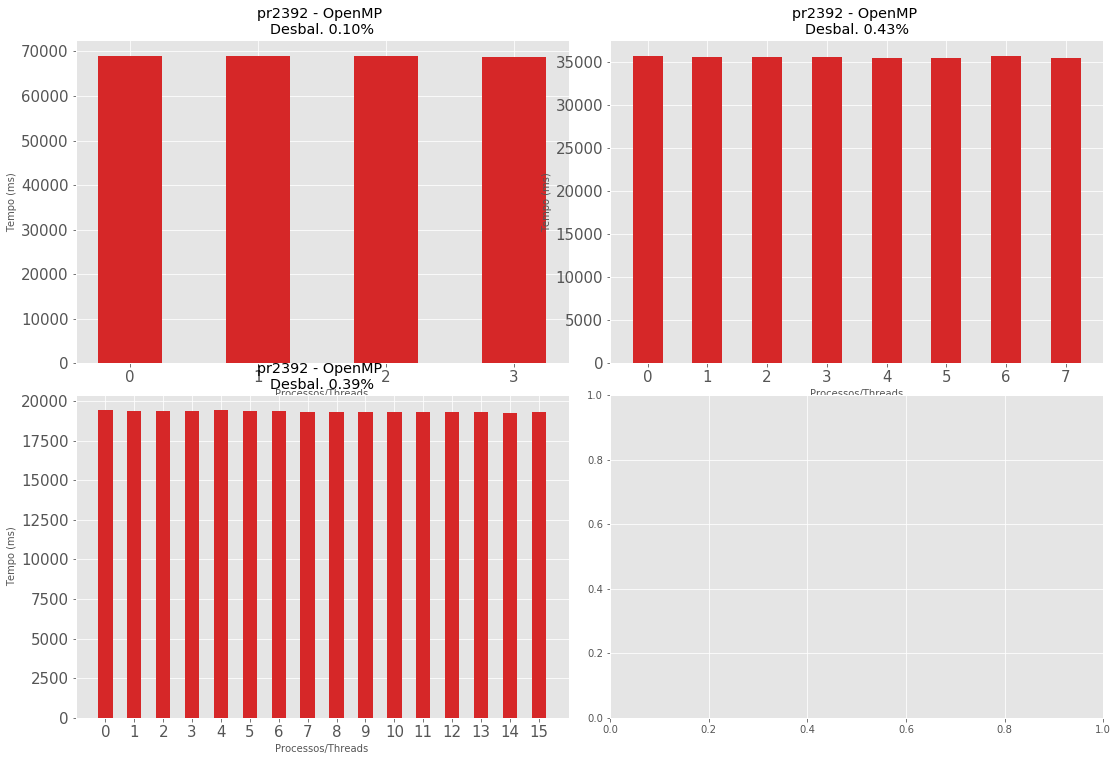

In [173]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
fig.tight_layout()
runs = []
for p in [4, 8 , 16]:
    openMP2=np.array(data[(data.Caso=="pr2392") & (data["Processos/Threads"]==p) &(data.Tipo=="OpenMP")]["Id"])
    runs.append(openMP2[1])

for i, run in enumerate(runs):
    plot_parallel(ax[i/2,i%2], open_json(run), caso = "pr2392 - OpenMP")

# Resultados para mais de um nó

In [174]:
data4, mean_data4, casos4, tipos = get_data("NewResults/resultados_4_nos_random.txt")
data4.Tipo = "MPI_4"
mean_data4.Tipo = "MPI_4"
print casos4

['pcb442' 'pr1002' 'pr2392' 'd15112']


In [175]:
data6, mean_data6, casos6, tipos = get_data("NewResults/resultados_6_nos_random.txt")
data6.Tipo = "MPI_6"
mean_data6.Tipo = "MPI_6"
print casos4


data6 = data6[data6["Processos/Threads"] >= 16]
mean_data6 = mean_data6[mean_data6["Processos/Threads"] >= 16]

tipos = ["MPI_4", "MPI_6"]

['pcb442' 'pr1002' 'pr2392' 'd15112']


In [176]:
print names
std_data4 = data4.groupby(names[0:3], as_index=True).std()
for name in names[3:]:
    key = "%s (std)" % name
    mean_data4[key.strip()] = np.array(std_data4[name])

    
print names
std_data6 = data6.groupby(names[0:3], as_index=True).std()
for name in names[3:]:
    key = "%s (std)" % name
    mean_data6[key.strip()] = np.array(std_data6[name])

    

['Caso', 'Tipo', 'Processos/Threads', 'TempoTotal', 'TempoEncontrarMinimo', 'TempoSincronizar', 'TempoSwap', 'Iteracoes', 'CustoCalc', 'CustoOtimo', 'TempoSincronizar/Iteracoes', 'Tamanho']
['Caso', 'Tipo', 'Processos/Threads', 'TempoTotal', 'TempoEncontrarMinimo', 'TempoSincronizar', 'TempoSwap', 'Iteracoes', 'CustoCalc', 'CustoOtimo', 'TempoSincronizar/Iteracoes', 'Tamanho']


pcb442 [ 1.          1.70438651  2.36323305  3.59052219  4.16361035  3.10081558]
pcb442 [ 1.          1.93108931  3.6376122 ]
pcb442 [ 1.          1.37143558  1.70385453  1.60707731]
pcb442 [ 1.          1.93108931  3.6376122 ]
pr1002 [ 1.          1.86620922  3.232529    5.6575416   8.48601438  6.06624775]
pr1002 [ 1.          1.93108931  3.6376122 ]
pr1002 [ 1.          1.74995657  2.6298699   3.03390789]
pr1002 [ 1.          1.93108931  3.6376122 ]
pr2392 [ 1.          1.95308885  3.64448789  2.56719455]
pr2392 [ 1.          1.93108931  3.6376122 ]
pr2392 [ 1.          1.95151291  3.59033882  5.03425394]
pr2392 [ 1.          1.93108931  3.6376122 ]
d15112 [ 1.          1.78296186  3.91215696  2.81744942]
d15112 [ 1.          1.93108931  3.6376122 ]
d15112 [ 1.          1.99321898  3.91241288  5.84946385]
d15112 [ 1.          1.93108931  3.6376122 ]


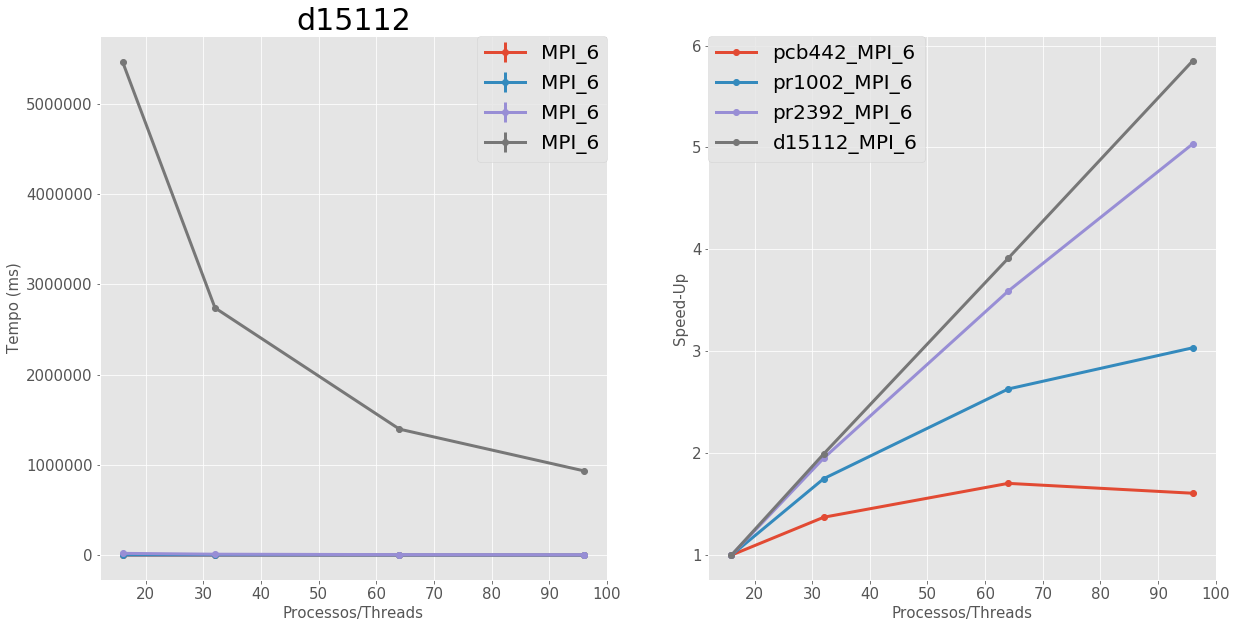

In [177]:
fig, axis = plt.subplots(1,2, figsize=(20,10))
for i, caso in enumerate(casos4):
    r = mean_data4[mean_data4.Caso == caso]

    set_ax_style(axis[0])
    set_ax_style(axis[1])
    
    procs = r[r.Tipo=="MPI_4"]["Processos/Threads"]
    tempoMPI = np.array(r[r.Tipo=="MPI_4"]["TempoTotal"])
    tempoMPIstd = np.array(r[r.Tipo=="MPI_4"]["TempoTotal (std)"])
    speedUpMPI = np.power(np.array(tempoMPI),-1)*tempoMPI[0]
    
   
    print caso, speedUpMPI
    print caso, speedUpOpenMP
    
    #axis[0].errorbar(procs, tempoMPI, marker="o",lw=3, label="MPI_4", yerr=tempoMPIstd)
    #axis[1].plot(procs, speedUpMPI, marker="o",lw=3, label="MPI_4")
    
    r = mean_data6[mean_data6.Caso == caso]
    procs = r[r.Tipo=="MPI_6"]["Processos/Threads"]
    tempoMPI = np.array(r[r.Tipo=="MPI_6"]["TempoTotal"])
    tempoMPIstd = np.array(r[r.Tipo=="MPI_6"]["TempoTotal (std)"])
    speedUpMPI = np.power(np.array(tempoMPI),-1)*tempoMPI[0]
    
   
    print caso, speedUpMPI
    print caso, speedUpOpenMP
    
    axis[0].errorbar(procs, tempoMPI, marker="o",lw=3, label="MPI_6", yerr=tempoMPIstd)
    axis[1].plot(procs, speedUpMPI, marker="o",lw=3, label="%s_MPI_6"%caso)

        
    axis[0].legend(borderaxespad=0., fontsize=20)
    axis[0].set_xlabel("Processos/Threads", fontsize=15)
    axis[1].set_xlabel("Processos/Threads", fontsize=15)
    axis[0].set_ylabel("Tempo (ms)", fontsize=15)
    axis[1].set_ylabel("Speed-Up", fontsize=15)
    axis[1].legend(borderaxespad=0., fontsize=20)
    axis[0].set_title(caso, fontsize=30)
    
plt.savefig("Figures/speedup_%s.png" % caso)

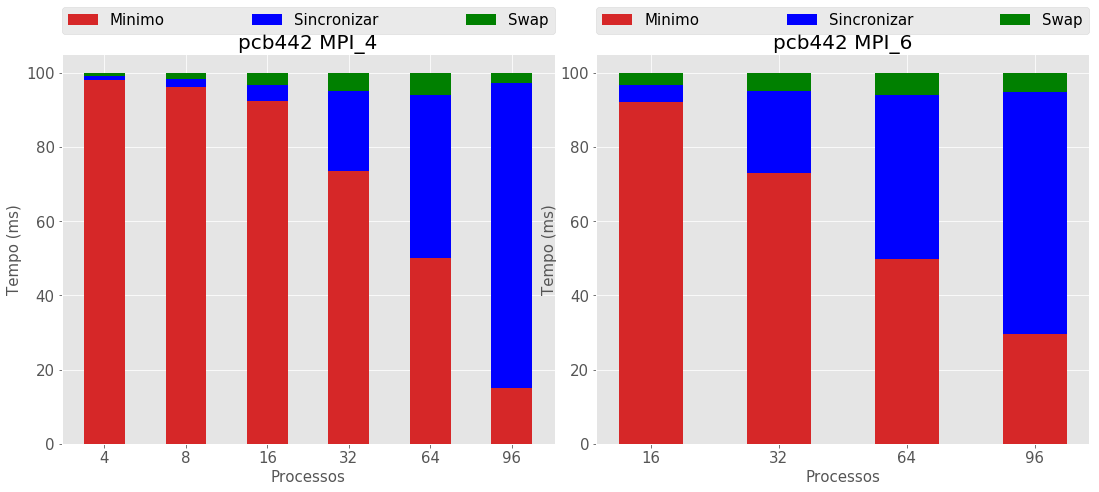

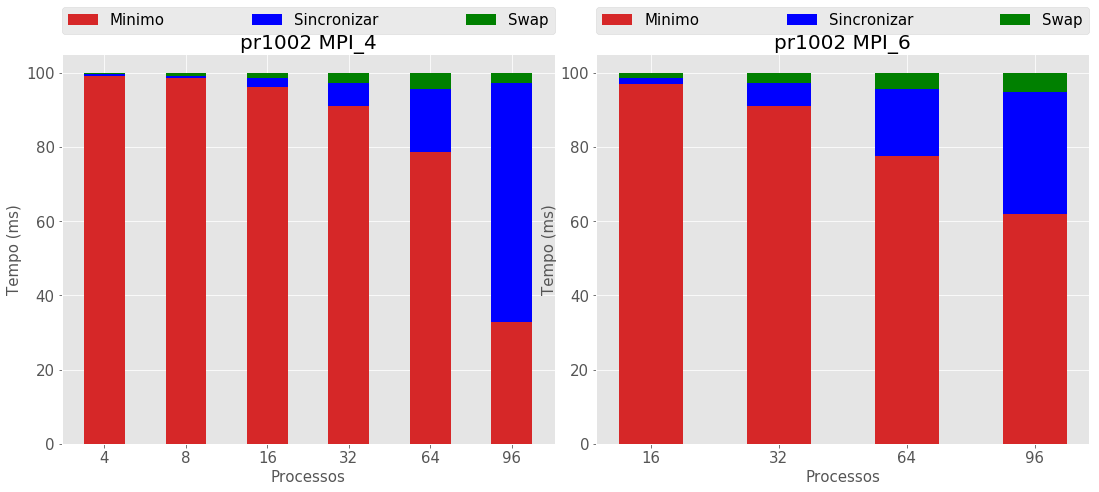

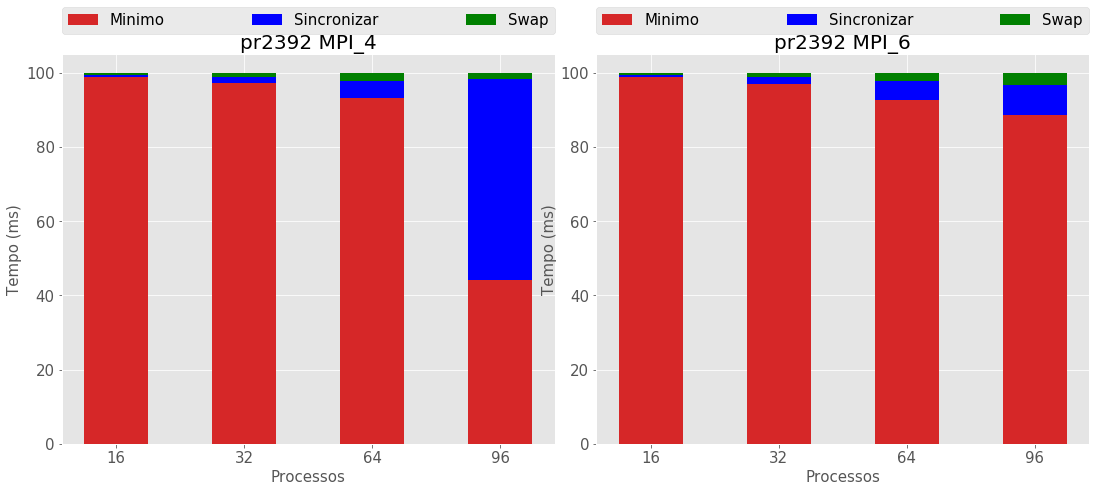

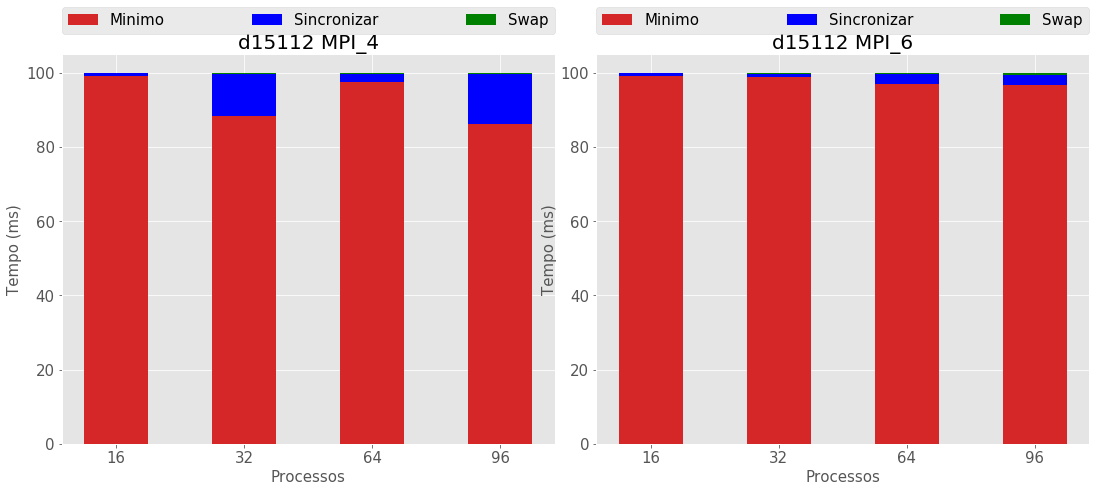

In [178]:
for caso in casos4:
    fig, axis = plt.subplots(1,2, figsize=(15,6))
    plt.tight_layout()
    for iax,tipo in enumerate(tipos):
        set_ax_style(axis[iax])
        width = 0.5       # the width of the bars: can also be len(x) sequence

        r = mean_data4[mean_data4.Caso == caso] if iax == 0 else mean_data6[mean_data6.Caso == caso] 
        tipo = "MPI_4" if iax == 0 else "MPI_6"
        procs = r[r.Tipo==tipo]["Processos/Threads"]

        # positions of the left bar-boundaries
        bar_l = [i+1 for i in range(len(procs))]

        # positions of the x-axis ticks (center of the bars as bar labels)
        tick_pos = [i+(width/2) for i in bar_l]   

        tempoEncMinMPI = np.array(r[r.Tipo==tipo]["TempoEncontrarMinimo"])

        tempoSincMPI = np.array(r[r.Tipo==tipo]["TempoSincronizar"])

        tempoSwapMPI = np.array(r[r.Tipo==tipo]["TempoSwap"])

        tempoTotal = tempoEncMinMPI + tempoSincMPI + tempoSwapMPI
        
        tempoEncMinMPI = 100*tempoEncMinMPI/tempoTotal
        tempoSincMPI = 100*tempoSincMPI/tempoTotal
        tempoSwapMPI = 100*tempoSwapMPI/tempoTotal
        
        
        ind = np.arange(len(procs))    # the x locations for the groups

        axis[iax].set_xticks(ind)
        axis[iax].set_xticklabels(tuple(procs))

        p1 = axis[iax].bar(ind, tempoEncMinMPI, width, color='#d62728')
        p2 = axis[iax].bar(ind, tempoSincMPI, width,
                     bottom=tempoEncMinMPI, color="blue")
        p3 = axis[iax].bar(ind, tempoSwapMPI, width,
                     bottom=tempoSincMPI+tempoEncMinMPI, color="green")

        axis[iax].set_xlabel("Processos", fontsize=15)
        axis[iax].set_ylabel('Tempo (ms)', fontsize=15)
        axis[iax].set_title('%s %s' % (caso, tipo), fontsize=20)

        axis[iax].legend((p1[0], p2[0], p3[0]), ('Minimo', 'Sincronizar', 'Swap'), fontsize=15, loc=9, bbox_to_anchor=(0., 1.02, 1., .102), mode="expand", ncol=len(procs), borderaxespad=0.)    

    #
    plt.savefig("Figures/bar_rel_%s.png"%(caso))
    plt.show()

0 0
0 1
1 0
1 1


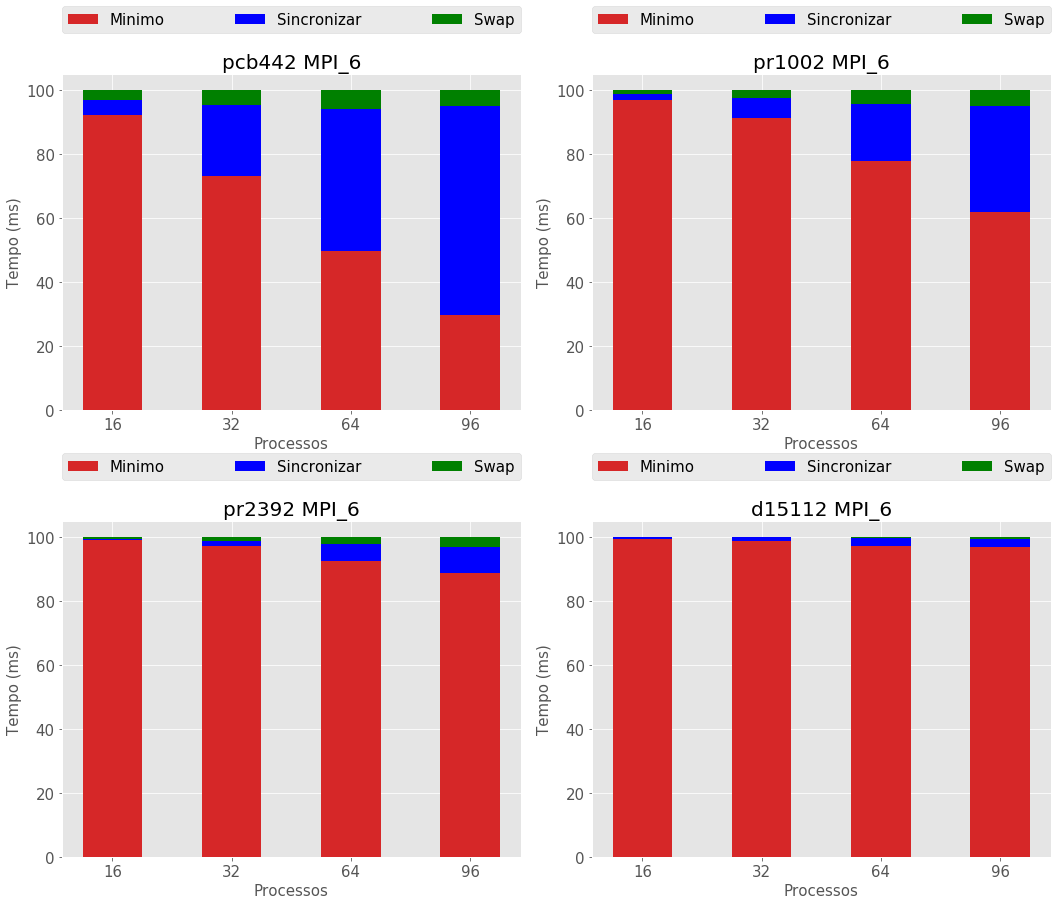

In [179]:
fig, axs = plt.subplots(2,2, figsize=(15,12))

plt.tight_layout(pad=3, h_pad=9, w_pad=4)
for i,caso in enumerate(casos4):
    lin = i/2
    col = i%2
    print lin, col
    axis = axs[lin, col]
 
    set_ax_style(axis)
    width = 0.5       # the width of the bars: can also be len(x) sequence

    r = mean_data6[mean_data6.Caso == caso] 
    tipo ="MPI_6"
    procs = r[r.Tipo==tipo]["Processos/Threads"]

    # positions of the left bar-boundaries
    bar_l = [i+1 for i in range(len(procs))]

    # positions of the x-axis ticks (center of the bars as bar labels)
    tick_pos = [i+(width/2) for i in bar_l]   

    tempoEncMinMPI = np.array(r[r.Tipo==tipo]["TempoEncontrarMinimo"])

    tempoSincMPI = np.array(r[r.Tipo==tipo]["TempoSincronizar"])

    tempoSwapMPI = np.array(r[r.Tipo==tipo]["TempoSwap"])

    tempoTotal = tempoEncMinMPI + tempoSincMPI + tempoSwapMPI

    tempoEncMinMPI = 100*tempoEncMinMPI/tempoTotal
    tempoSincMPI = 100*tempoSincMPI/tempoTotal
    tempoSwapMPI = 100*tempoSwapMPI/tempoTotal


    ind = np.arange(len(procs))    # the x locations for the groups

    axis.set_xticks(ind)
    axis.set_xticklabels(tuple(procs))

    p1 = axis.bar(ind, tempoEncMinMPI, width, color='#d62728')
    p2 = axis.bar(ind, tempoSincMPI, width,
                 bottom=tempoEncMinMPI, color="blue")
    p3 = axis.bar(ind, tempoSwapMPI, width,
                 bottom=tempoSincMPI+tempoEncMinMPI, color="green")

    axis.set_xlabel("Processos", fontsize=15)
    axis.set_ylabel('Tempo (ms)', fontsize=15)
    axis.set_title('%s %s' % (caso, tipo), fontsize=20)

    axis.legend((p1[0], p2[0], p3[0]), ('Minimo', 'Sincronizar', 'Swap'), fontsize=15, loc=3, bbox_to_anchor=(0., 1.12, 1., .102), mode="expand", ncol=len(procs), borderaxespad=0., )    

    #


plt.savefig("Figures/bar_rel_%s.png"%(caso))
plt.show()


150483453961000036211760
150483475296000016435298
1504396008432000019932170
150440657192152000069513419


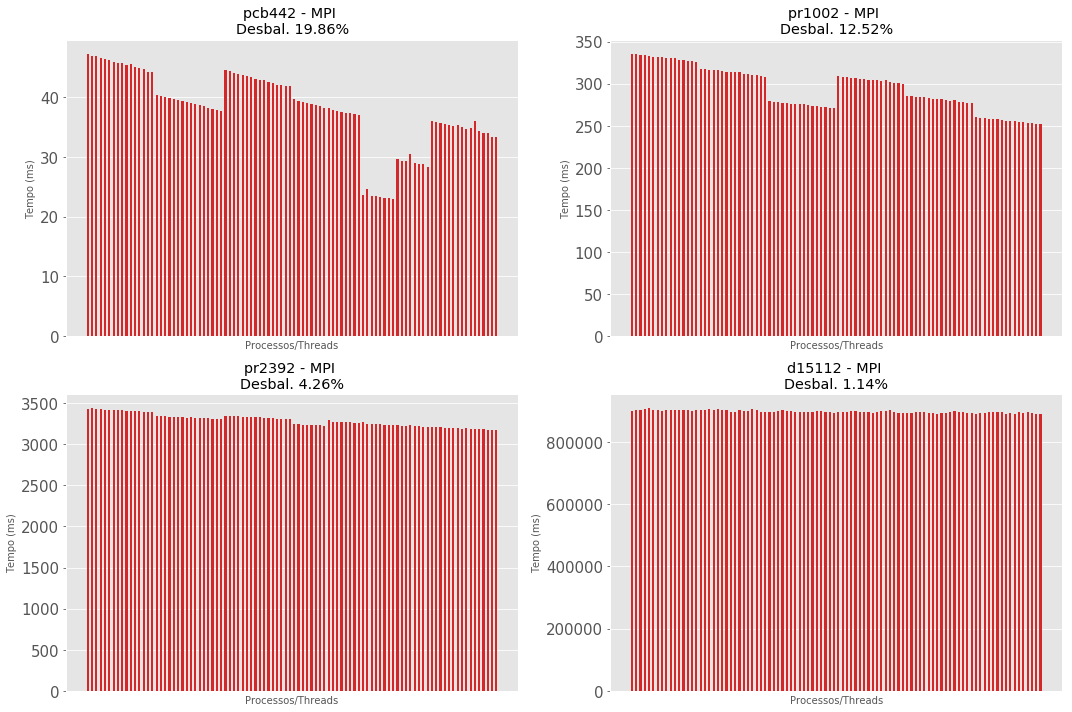

In [180]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
fig.tight_layout()
threads = 96
runs = []
for i,caso in enumerate(casos4):
    openMP2=np.array(data6[(data6.Caso==caso) & (data6["Processos/Threads"]==96) &(data6.Tipo=="MPI_6")]["Id"])
    print openMP2[0]
    plot_parallel(ax[i/2,i%2], open_json(openMP2[0]), caso = "%s - MPI" % caso)
    ax[i/2,i%2].set_xticks([])

fig.tight_layout()
